___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [742]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams["figure.figsize"] = (7,4)

#### Load Dataset

In [743]:
df = pd.read_csv('Mall_Customers.csv')

#### Explore Data

You can rename columns to more usable, if you need.

In [744]:
df.head(13)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [745]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [746]:
change_column_name = {'Annual Income (k$)':'Annual_Income', 
                      'Spending Score (1-100)':'Spending_Score'}
df.rename(columns=change_column_name,inplace=True)

In [747]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [748]:
df.head(13)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [749]:
print('''
--------------- for numercal describe ---------------
{}
--------------- for Object describe ---------------
{}'''.format(df.describe(include='int'), df.describe(include='object')))


--------------- for numercal describe ---------------
       CustomerID         Age  Annual_Income  Spending_Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       50.200000
std     57.879185   13.969007      26.264721       25.823522
min      1.000000   18.000000      15.000000        1.000000
25%     50.750000   28.750000      41.500000       34.750000
50%    100.500000   36.000000      61.500000       50.000000
75%    150.250000   49.000000      78.000000       73.000000
max    200.000000   70.000000     137.000000       99.000000
--------------- for Object describe ---------------
        Gender
count      200
unique       2
top     Female
freq       112


In [750]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [751]:
print('''
Number of duplicated is :  {}
Number of null values is : {}
--------------Shape of the data frame is ----------------
{}
'''.format(df.duplicated().sum(),df.isna().sum().sum(),df.shape))


Number of duplicated is :  0
Number of null values is : 0
--------------Shape of the data frame is ----------------
(200, 5)



### Dealing with Unnecessary columns 

In [752]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [753]:
df.drop(columns='CustomerID',inplace=True) # CustomerID is the same as an index so we don't need it 

In [754]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [755]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

## cheaking for unique object or numercal 

In [756]:
df.nunique() 

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

In [757]:
df.Gender.value_counts() # need to map it for numercal values 

Female    112
Male       88
Name: Gender, dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [758]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [759]:
px.histogram(df , x='Gender',color='Gender')

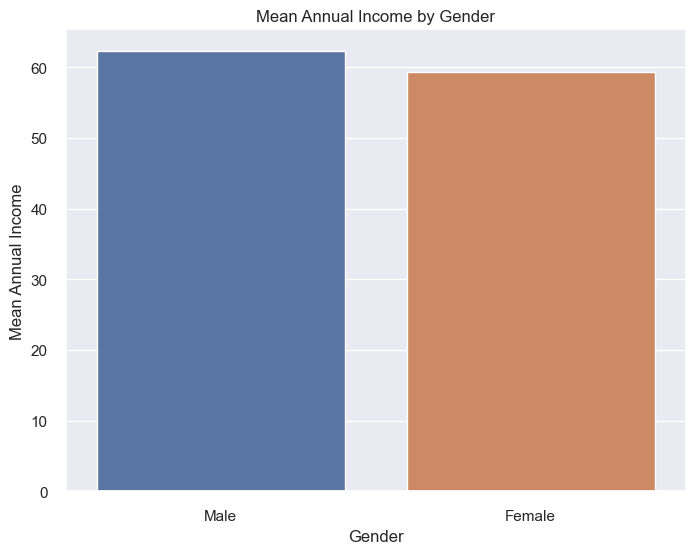

,Gender,Annual_Income
0,Female,59.250000
1,Male,62.227273


In [760]:
mean_income_by_gender = df.groupby('Gender')['Annual_Income'].mean().reset_index()
sns.set(style="darkgrid")

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Annual_Income', data=mean_income_by_gender,order=['Male', 'Female'])
plt.title('Mean Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Annual Income')
plt.show()
mean_income_by_gender

In [761]:
px.histogram(df, x='Annual_Income', title='Annual Income Distribution',color='Gender')

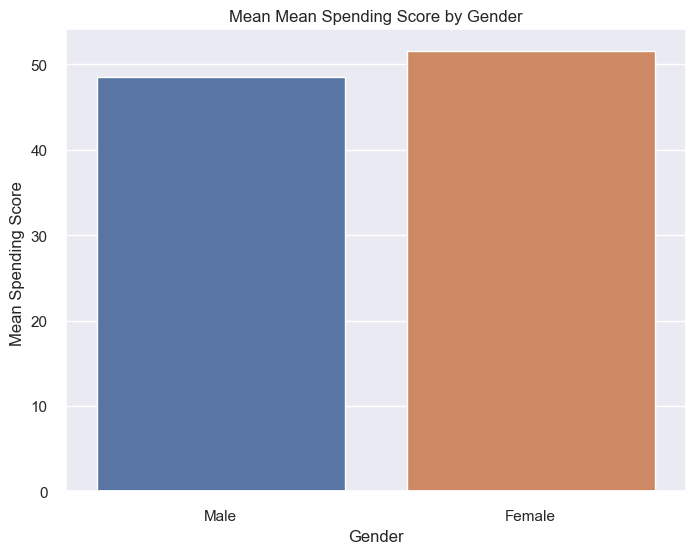

,Gender,Spending_Score
0,Female,51.526786
1,Male,48.511364


In [762]:
mean_Score_by_gender = df.groupby('Gender')['Spending_Score'].mean().reset_index()
sns.set(style="darkgrid")

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Spending_Score', data=mean_Score_by_gender,order=['Male', 'Female'])
plt.title('Mean Mean Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Spending Score ')
plt.show()
mean_Score_by_gender

In [763]:
px.histogram(df, x='Spending_Score', title='Spending Score Distribution',color='Gender')

In [764]:
df.Age.max()

70

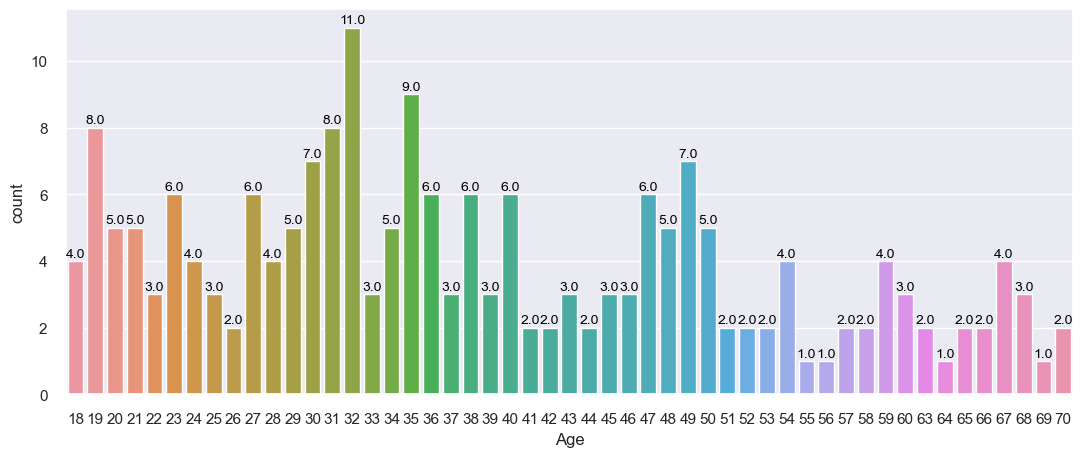

In [765]:
plt.figure(figsize=(13,5))
ax = sns.countplot(x=df['Age'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


In [766]:
df.groupby('Gender')['Age'].max()


Gender
Female    68
Male      70
Name: Age, dtype: int64

In [767]:
px.histogram(df, x='Age', title='Age Distribution',color='Gender')

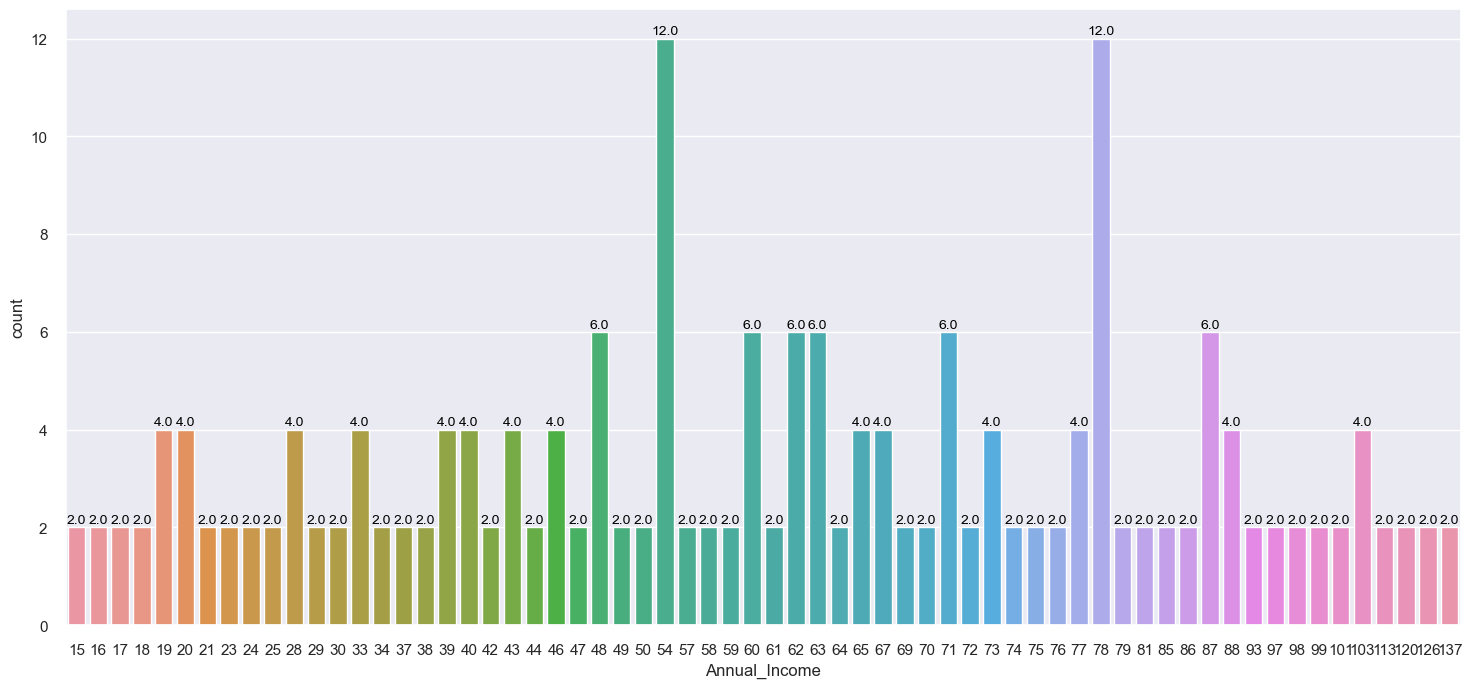

In [768]:
plt.figure(figsize=(18,8))
ax = sns.countplot(x=df['Annual_Income'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


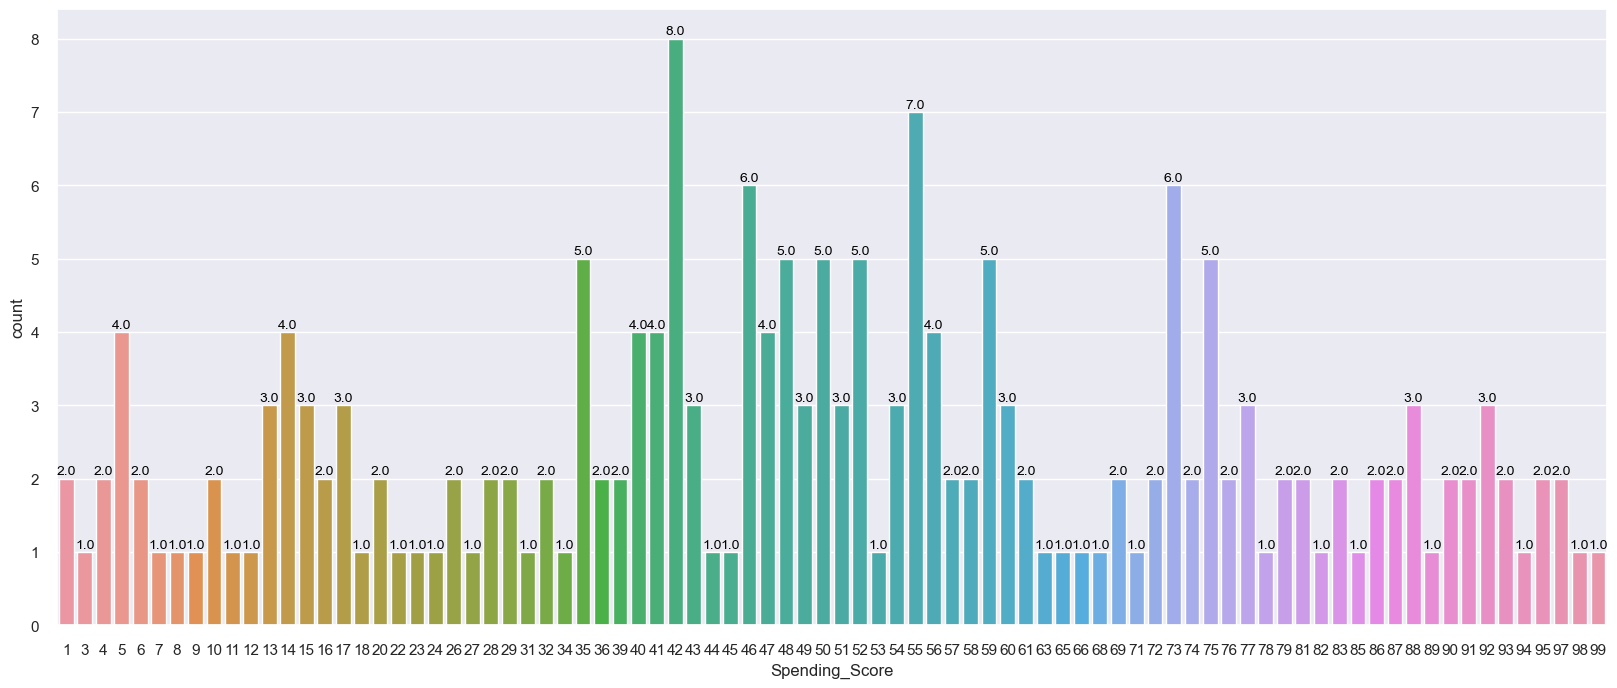

In [769]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x=df['Spending_Score'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


In [770]:
print(sns.__version__)  

0.12.2


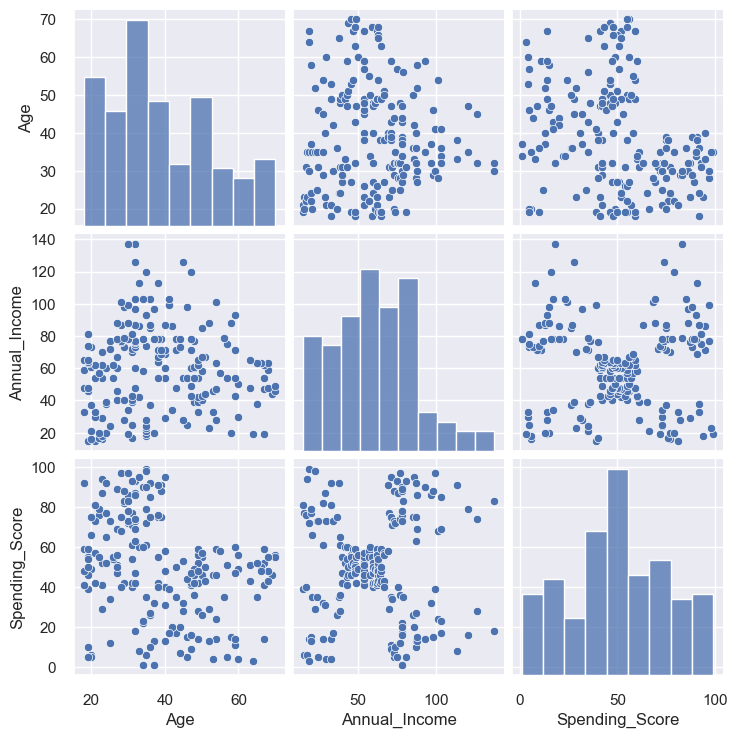

In [771]:
sns.pairplot(data=df)

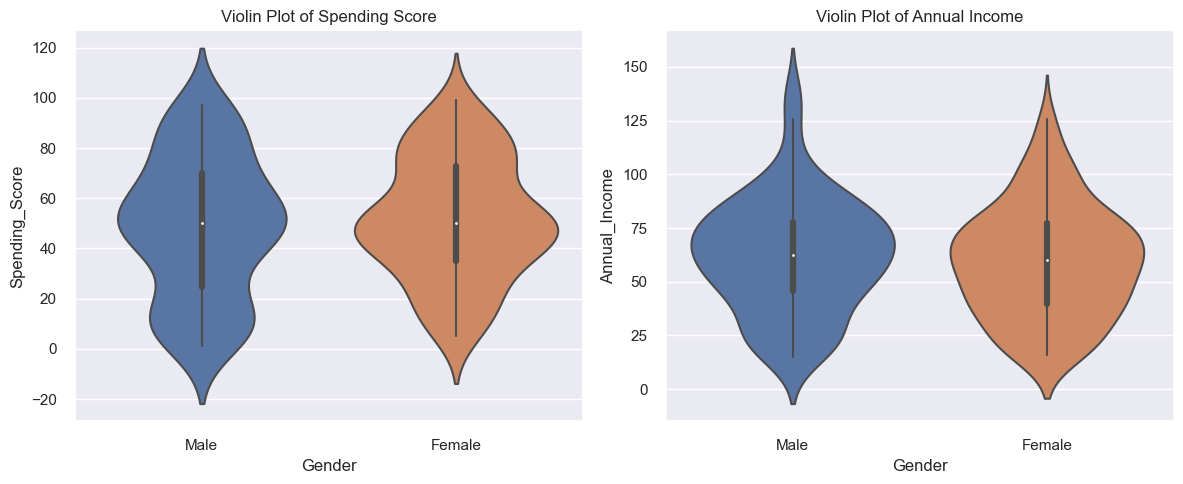

In [772]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(x='Gender', y='Spending_Score', data=df, ax=axes[0])
axes[0].set_title('Violin Plot of Spending Score')


sns.violinplot(x='Gender', y='Annual_Income', data=df, ax=axes[1])
axes[1].set_title('Violin Plot of Annual Income')


plt.tight_layout()
plt.show()


In [773]:
df

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [774]:
# gender= {'Male': 1, 'Female': 0}
# df['Gender'] = df['Gender'].map(gender)


In [775]:
Corr = df.drop(columns='Gender').corr()
Corr

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


<AxesSubplot:>

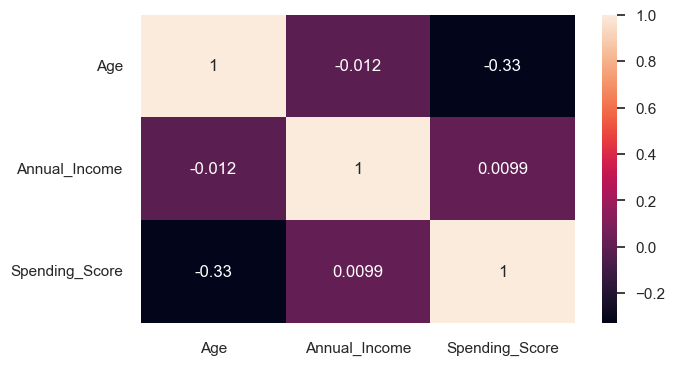

In [776]:
sns.heatmap(Corr,annot=True)

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

## You should 
 -  pip install numba --upgrade
 -  pip install pyclustertend

In [777]:
from pyclustertend import hopkins

In [778]:
X = df.drop(columns=["Gender",'Annual_Income']) 
X

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [779]:
hopkins(X,200)

0.3345186030282154

In [780]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def Hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2) 
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [781]:

Hopkins(X)

0.7596135306148493

***from pyclustertend import hopkins***:  is easy to use library which calculate the hopkins score which show is the clustering tendency 
from range 0 to 1 where the score of it close to 0 that makes it good clustering tendency 

and for the **function** it calculate it and we can adjust it but when it's close to 1 it good clustering tendency 

## We can see that the data has a good clustering tendency 

#### *ii. Determine optimal number of clusters*

In [782]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,14)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=13)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

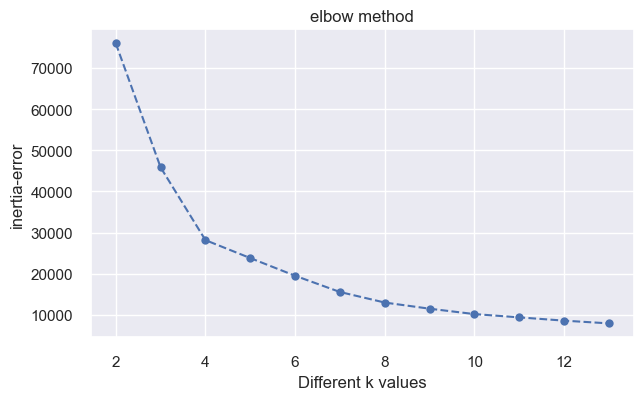

In [783]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [784]:
h ={}
for index,i in enumerate(ssd,2):
    h[f'{index}'] = i 
inertia_error_df = pd.DataFrame(list(h.items()), columns=['Clusters', 'inertia-error']).set_index('Clusters')
inertia_error_df


,inertia-error
Clusters,
2,75949.156010
3,45840.676616
4,28165.583567
5,23810.462233
6,19515.469236
7,15571.061675
8,13006.483629
9,11511.350199
10,10205.776046


In [785]:
inertia_error_df.diff()

,inertia-error
Clusters,
2,NaN
3,-30108.479394
4,-17675.093049
5,-4355.121334
6,-4294.992997
7,-3944.407560
8,-2564.578047
9,-1495.133430
10,-1305.574153


Text(0.5, 1.0, 'elbow method')

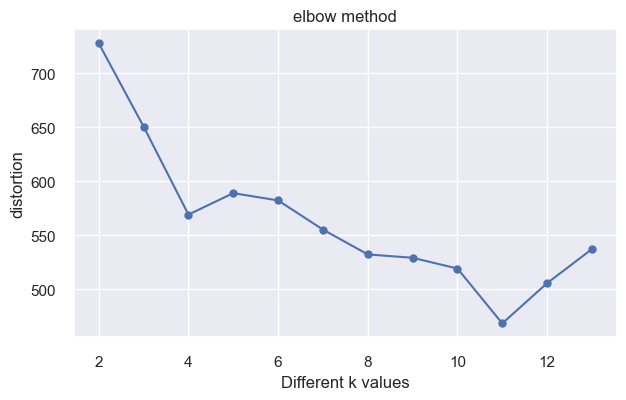

In [786]:
def calculate_distortion(X, k):
    kmeanModel = KMeans(n_clusters=k, random_state=13)
    kmeanModel.fit(X)
    distances = kmeanModel.transform(X)
    labels = kmeanModel.labels_
    
    cluster_distances = [distances[labels == i, i] for i in range(k)]
    return sum(np.mean(cluster_distances[i] ** 2) for i in range(k))

K = range(2, 14)
for k in K:
    distortion = [calculate_distortion(X, k) for k in K]
    
plt.plot(K, distortion, "bo-")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")



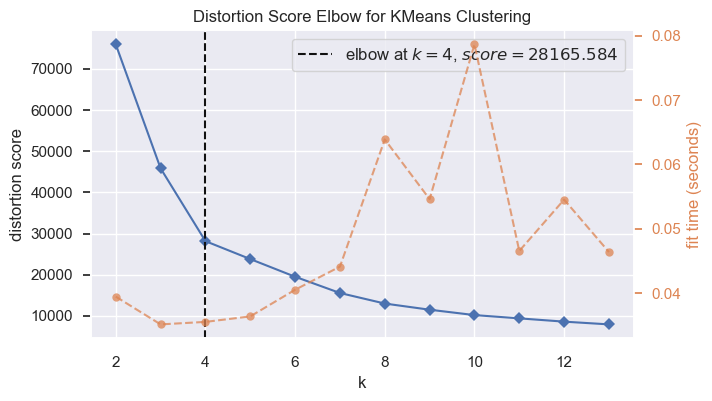

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [787]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(random_state=13)
visu = KElbowVisualizer(kmeans, k = (2,14))
visu.fit(X)
visu.show()

In [788]:
from sklearn.metrics import silhouette_score


In [789]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 14)
silhouette_scores = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=13)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
silhouette_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores})
silhouette_df.set_index('Number of Clusters', inplace=True)

print(silhouette_df)


                    Silhouette Score
Number of Clusters                  
2                           0.469234
3                           0.453001
4                           0.499739
5                           0.446031
6                           0.444190
7                           0.410531
8                           0.432150
9                           0.412452
10                          0.406614
11                          0.416786
12                          0.408019
13                          0.394026


In [790]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

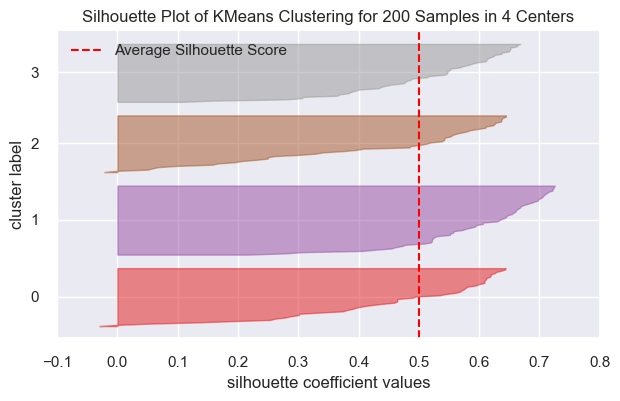

In [791]:
model3 = KMeans(n_clusters=4, random_state=13)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [792]:
j = {}  
for i in range(model3.n_clusters):
    label = (model3.labels_ == i)
    j[f'label {i}'] = visualizer.silhouette_samples_[label].mean()
silhouette_df = pd.DataFrame(list(j.items()), columns=['Label', 'Mean Silhouette Score'])
silhouette_df.set_index('Label',inplace=True)
print(silhouette_df)
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

         Mean Silhouette Score
Label                         
label 0               0.454290
label 1               0.596078
label 2               0.419729
label 3               0.509130
mean silhouette score for all labels : 0.49973941540141753


### Why silhouette_score is negative?

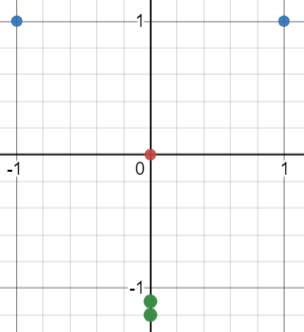

### Silhouette score closer to 1 suggests better-defined clusters, while scores closer to -1 indicate that data points may be assigned to the wrong clusters. A score around 0 can mean overlapping clusters or that the data does not exhibit clear clustering patterns. 

#### *iii. Apply K Means*

In [793]:
model = KMeans(n_clusters=4,random_state=13)
model.fit_predict(X)

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [794]:
model.labels_

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [795]:
X['Perdicted_label']=model.labels_

In [796]:
X

,Age,Spending_Score,Perdicted_label
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2
...,...,...,...
195,35,79,1
196,45,28,0
197,32,74,1
198,32,18,0


#### *iv. Visualizing and Labeling All the Clusters*

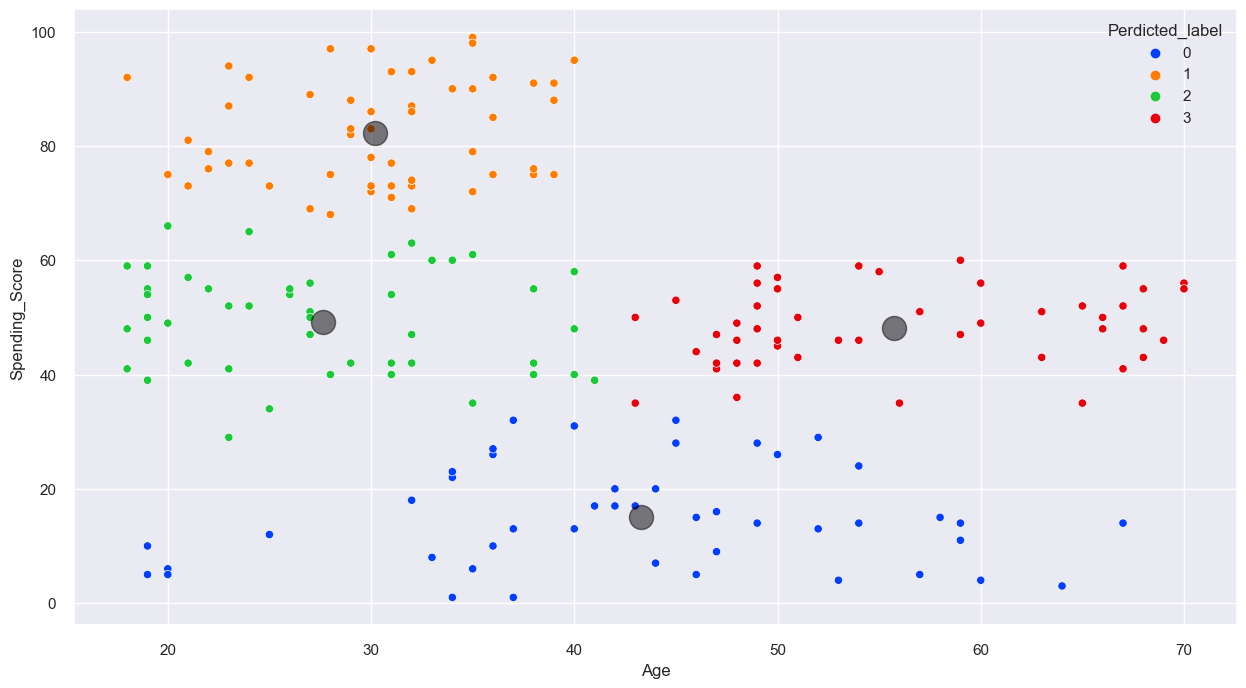

In [797]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending_Score', hue='Perdicted_label', data=X, palette="bright")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [798]:
X_AS = df.drop(columns=['Gender','Age']).copy()
X_AS

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [799]:
Hopkins(X_AS)

0.6781290673711785

In [800]:
hopkins(X_AS,200)

0.3100619500479933

#### *ii. Determine optimal number of clusters*

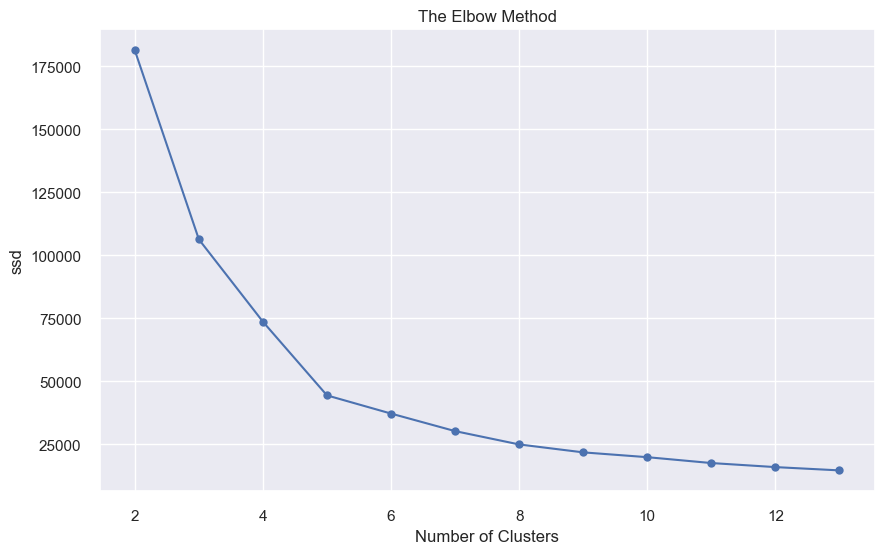

In [801]:
ssd =[]
for n in range(2,14):
    kmeans=KMeans(n_clusters=n, random_state=13)
    kmeans.fit(X_AS)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 14), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show();

In [802]:
X_AS

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0.5, 1.0, 'elbow method')

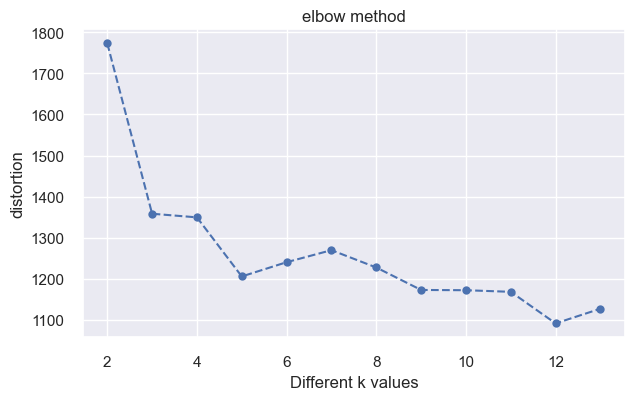

In [803]:
K = range(2, 14)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=13)
    kmeanModel.fit(X_AS)
    distances = kmeanModel.transform(X_AS) 
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] 
        
        result.append(np.mean(cluster_distances ** 2))
    distortion.append(sum(result))

plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

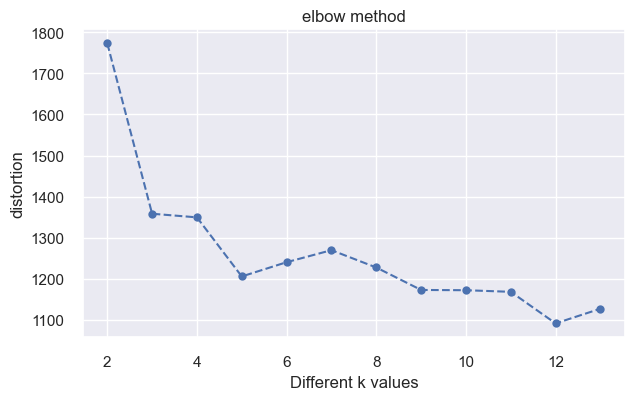

In [804]:
K = range(2, 14)
distortion = [calculate_distortion(X_AS, k) for k in K]

plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")
plt.show()

Text(0.5, 1.0, 'elbow method')

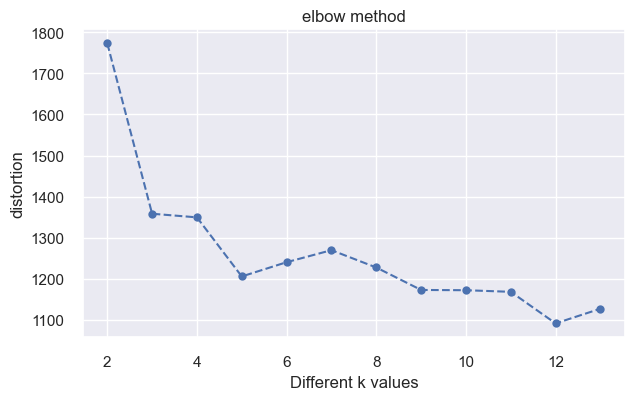

In [805]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [806]:
h ={}
for index,i in enumerate(ssd,2):
    h[f'{index}'] = i 
inertia_error_df = pd.DataFrame(list(h.items()), columns=['Clusters', 'inertia-error']).set_index('Clusters')
inertia_error_df

,inertia-error
Clusters,
2,181363.595960
3,106348.373062
4,73679.789039
5,44448.455448
6,37233.814511
7,30273.394312
8,24986.525641
9,21838.863693
10,19931.412603


In [807]:
np.abs(inertia_error_df.diff())

,inertia-error
Clusters,
2,NaN
3,75015.222897
4,32668.584023
5,29231.333592
6,7214.640937
7,6960.420199
8,5286.868671
9,3147.661948
10,1907.451089


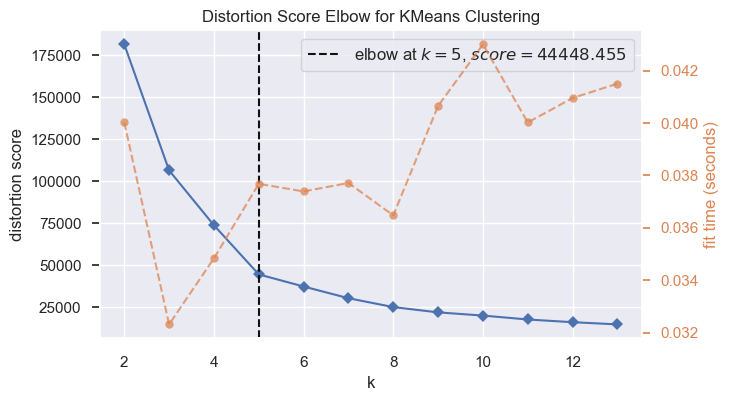

In [808]:
kmeans = KMeans(random_state=13)
visu = KElbowVisualizer(kmeans, k = (2,14))
visu.fit(X_AS)
visu.show();

In [809]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 14)
silhouette_scores = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=13)
    kmeans.fit(X_AS)
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
silhouette_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores})
silhouette_df.set_index('Number of Clusters', inplace=True)

print(silhouette_df)


                    Silhouette Score
Number of Clusters                  
2                           0.004938
3                           0.167930
4                           0.144790
5                           0.163695
6                           0.112909
7                           0.056993
8                          -0.037118
9                          -0.040013
10                         -0.037813
11                         -0.018820
12                         -0.069012
13                         -0.040518


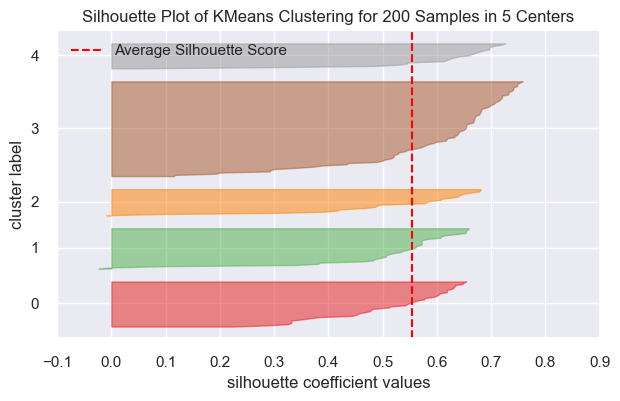

In [810]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(5, random_state=13)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_AS)    # Fit the data to the visualizer
visualizer.poof();

In [811]:
j = {}  
for i in range(model3.n_clusters):
    label = (model3.labels_ == i)
    j[f'label {i}'] = visualizer.silhouette_samples_[label].mean()
silhouette_df = pd.DataFrame(list(j.items()), columns=['Label', 'Mean Silhouette Score'])
silhouette_df.set_index('Label',inplace=True)
print(silhouette_df)
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

         Mean Silhouette Score
Label                         
label 0               0.509171
label 1               0.503987
label 2               0.512268
label 3               0.596651
label 4               0.599013
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [812]:
model2 = KMeans(n_clusters=5, random_state=13)
model2.fit_predict(X_AS) 

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3,
       2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [813]:
X_AS['Perdicted_labels'] = model2.labels_

In [814]:
X_AS

,Annual_Income,Spending_Score,Perdicted_labels
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,0
196,126,28,1
197,126,74,0
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

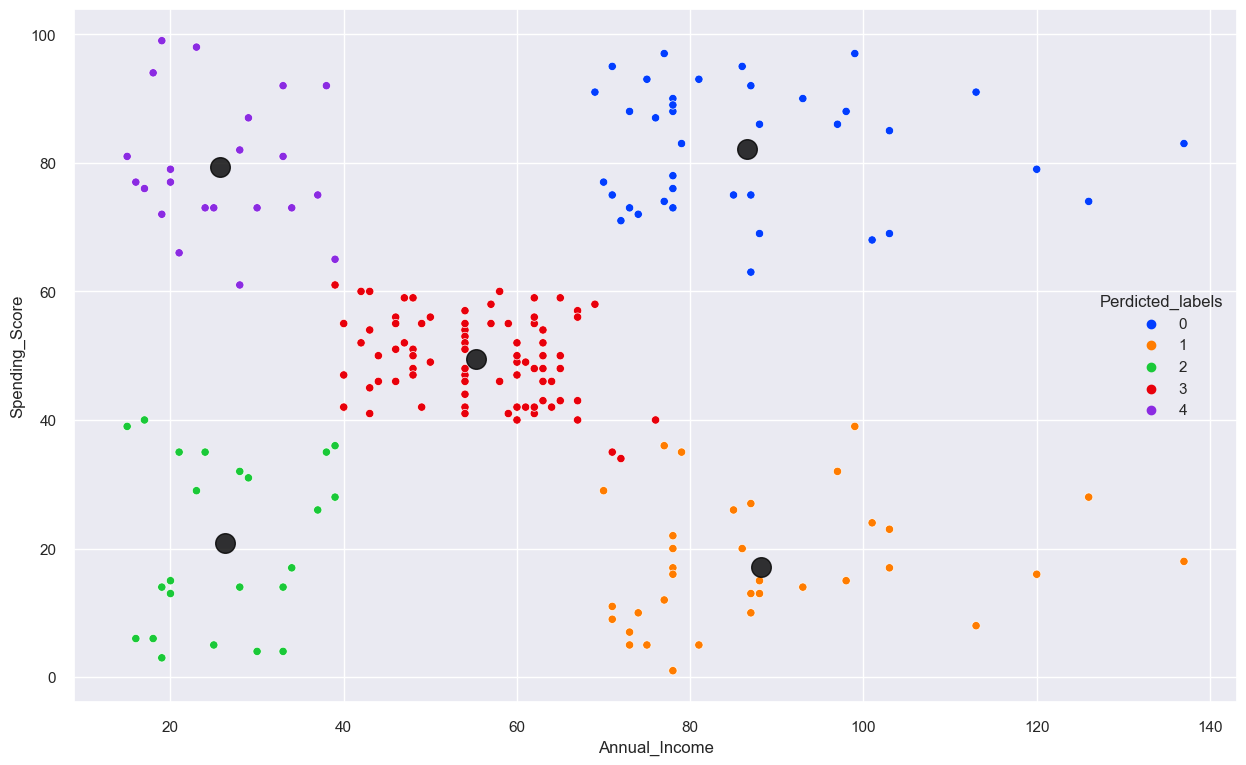

In [815]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Perdicted_labels', data=X_AS, palette="bright")
centers = model2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8);

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [816]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from ipywidgets import interact
from sklearn.cluster import AgglomerativeClustering

In [817]:
Hier_X = X.drop(columns='Perdicted_label').copy()
Hier_X

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [818]:
def plot_dendrogram(linkage_matrix, title, subplot_position):
    plt.subplot(subplot_position)
    plt.title(title)
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(linkage_matrix, leaf_font_size=10, truncate_mode='lastp', p=10, show_contracted=True) # You can change it for changing the dendrogram

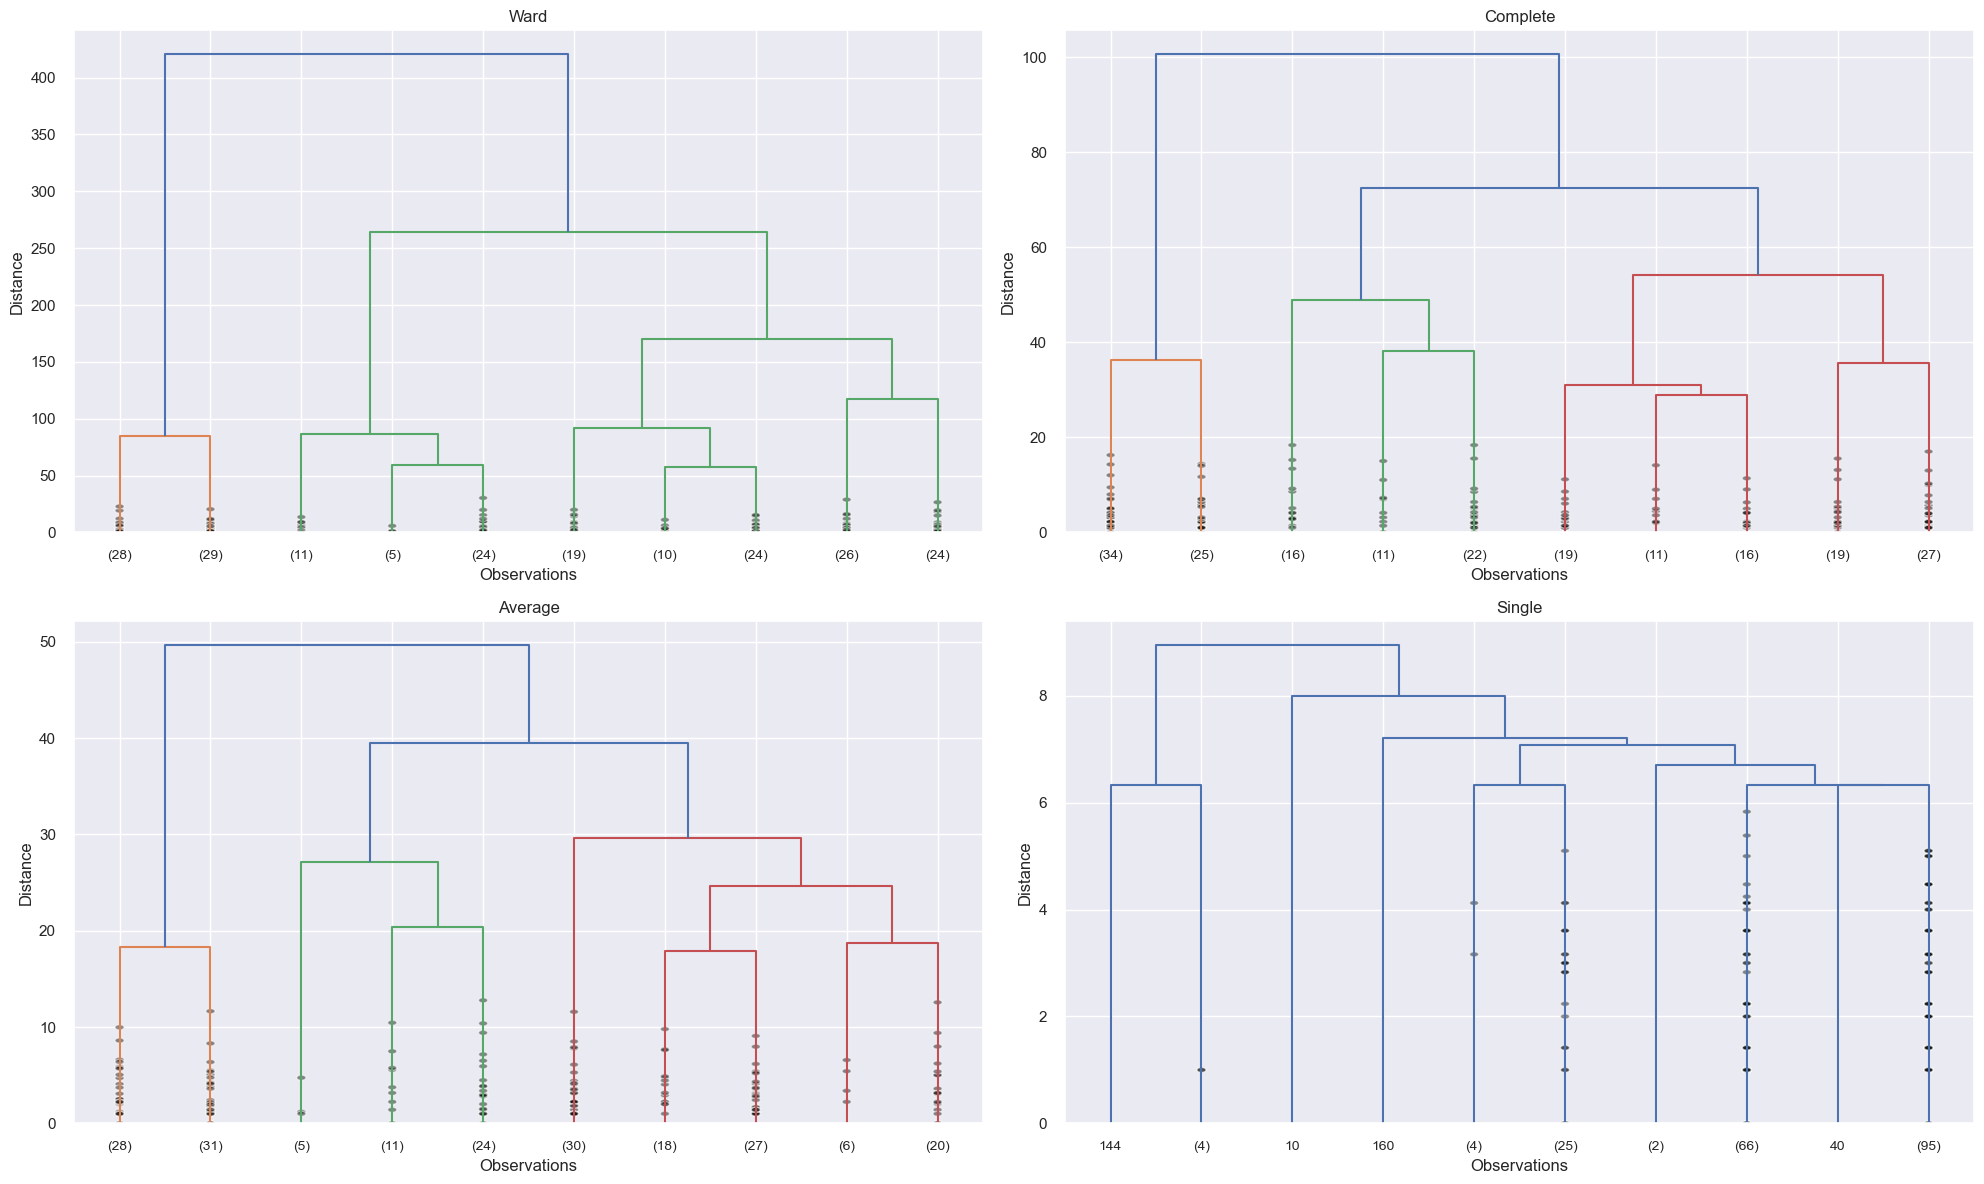

In [819]:
hc_ward = linkage(Hier_X, "ward")
hc_complete = linkage(Hier_X, "complete")
hc_average = linkage(Hier_X, "average")
hc_single = linkage(Hier_X, "single")

plt.figure(figsize=(20, 12))

plot_dendrogram(hc_ward, "Ward", 221)
plot_dendrogram(hc_complete, "Complete", 222)
plot_dendrogram(hc_average, "Average", 223)
plot_dendrogram(hc_single, "Single", 224)

plt.tight_layout()
plt.show()


In [820]:
range_n_clusters = range(2, 14)
silhouette_scores = []
for num_clusters in range_n_clusters:
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(Hier_X)
    cluster_labels = Agg_model.labels_
    silhouette_avg = silhouette_score(Hier_X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

silhouette_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores})
silhouette_df.set_index('Number of Clusters', inplace=True)
print(silhouette_df)


                    Silhouette Score
Number of Clusters                  
2                           0.454947
3                           0.441179
4                           0.460250
5                           0.403741
6                           0.412596
7                           0.415898
8                           0.388369
9                           0.394815
10                          0.387667
11                          0.393334
12                          0.404728
13                          0.413988


## Clustering based on Annual Income and Spending Score- x2

In [821]:
Hier_AS= X_AS.drop(columns='Perdicted_labels').copy()
Hier_AS

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


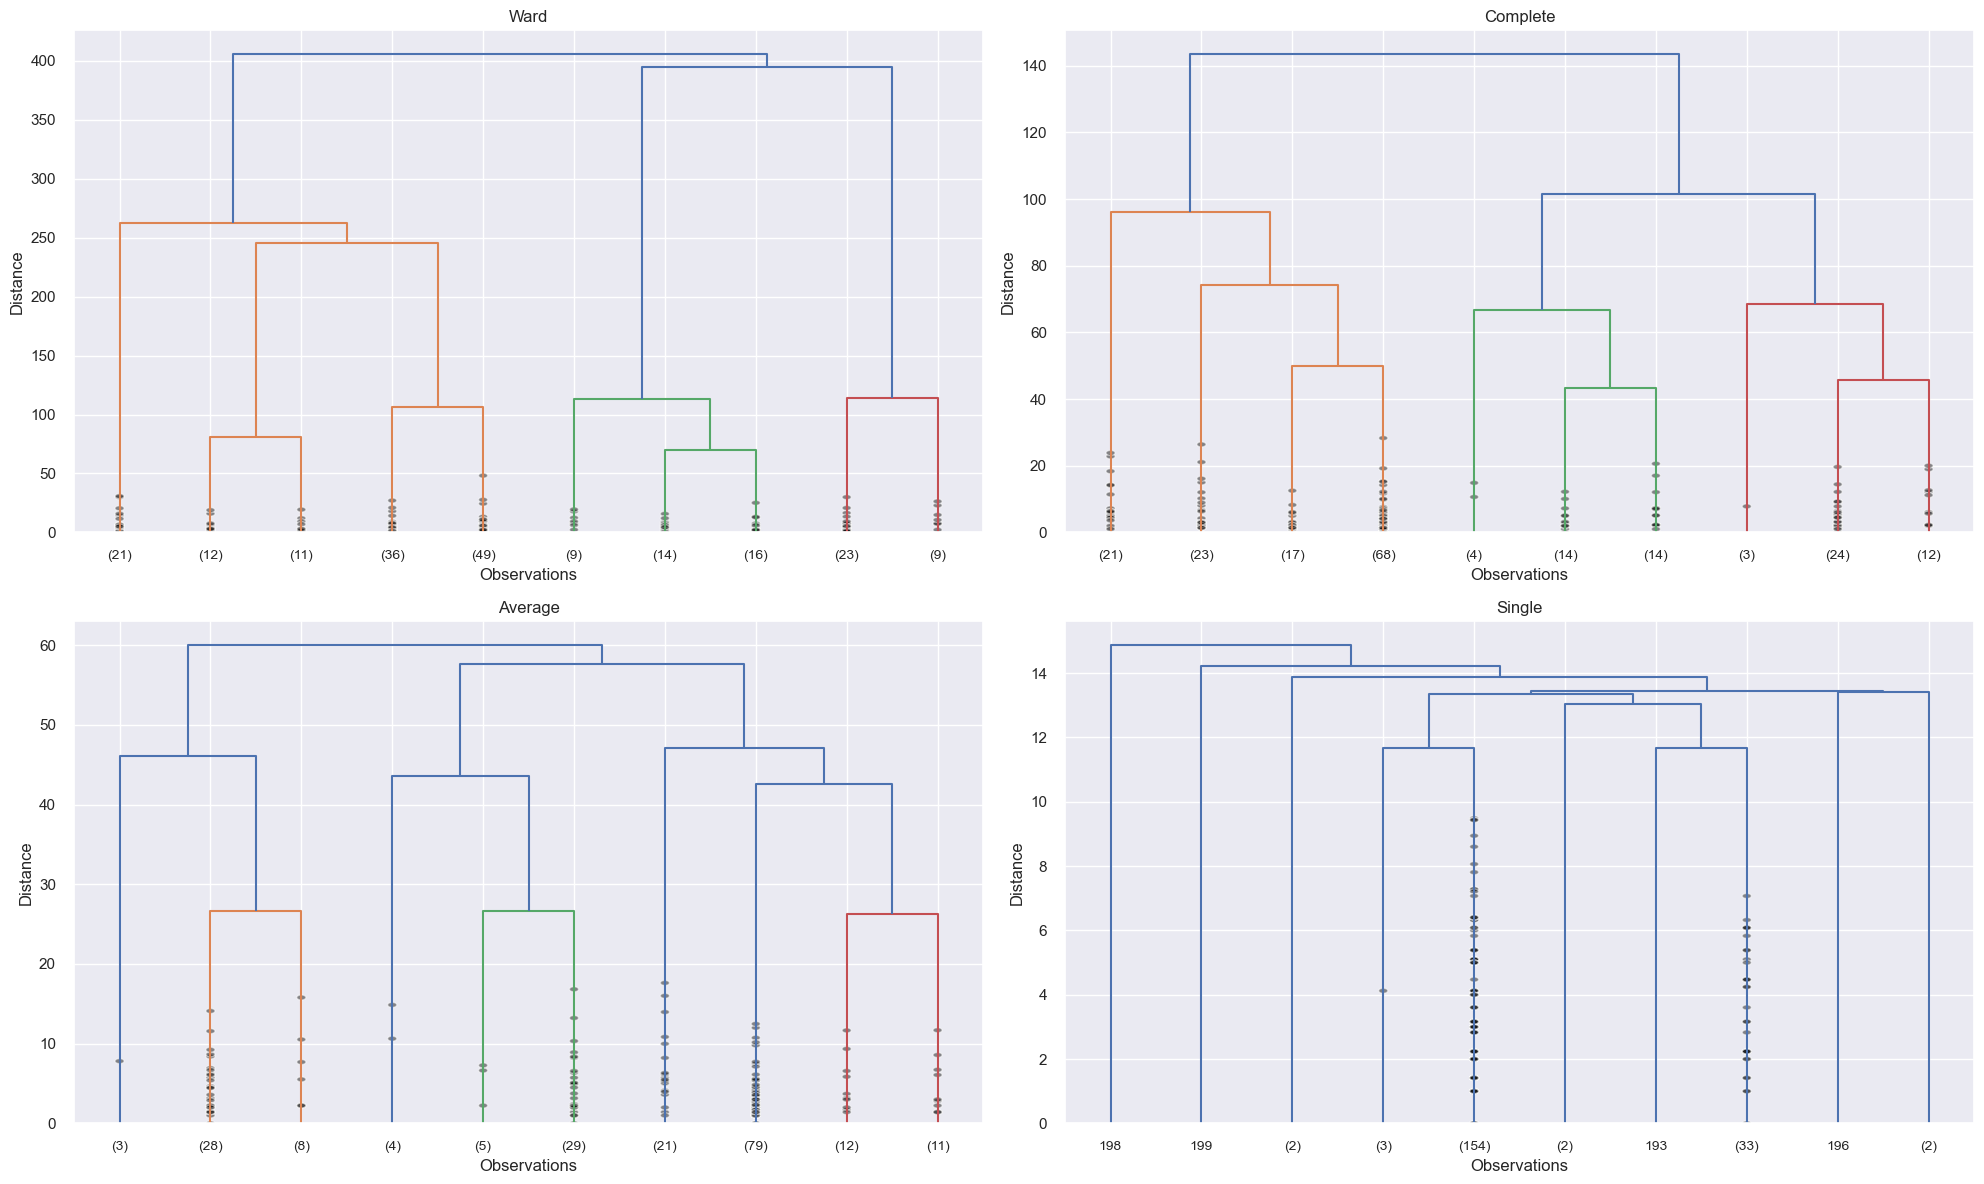

In [822]:
hc_ward_AS = linkage(Hier_AS, "ward")
hc_complete_AS = linkage(Hier_AS, "complete")
hc_average_AS = linkage(Hier_AS, "average")
hc_single_AS = linkage(Hier_AS, "single")

plt.figure(figsize=(20, 12))

plot_dendrogram(hc_ward_AS, "Ward", 221)
plot_dendrogram(hc_complete_AS, "Complete", 222)
plot_dendrogram(hc_average_AS, "Average", 223)
plot_dendrogram(hc_single_AS, "Single", 224)

plt.tight_layout()
plt.show()


In [823]:
range_n_clusters = range(2, 14)
silhouette_scores = []
for num_clusters in range_n_clusters:
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(Hier_AS)
    cluster_labels = Agg_model.labels_
    silhouette_avg = silhouette_score(Hier_X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

silhouette_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores})
silhouette_df.set_index('Number of Clusters', inplace=True)
print(silhouette_df)


                    Silhouette Score
Number of Clusters                  
2                           0.125649
3                           0.176304
4                           0.172271
5                           0.161480
6                           0.102870
7                           0.046015
8                          -0.043715
9                          -0.048470
10                         -0.035252
11                         -0.039954
12                         -0.082656
13                         -0.062856


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [824]:
Hier_X.head(1)

,Age,Spending_Score
0,19,39


In [825]:
Agg1 = AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward') 
Agg1.fit_predict(Hier_X)

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

In [826]:
X['AgglomerativeClustering'] = Agg1.labels_

In [827]:
X.rename(columns={'Perdicted_label': 'Kmeans'}, inplace=True)

In [828]:
X

,Age,Spending_Score,Kmeans,AgglomerativeClustering
0,19,39,2,0
1,21,81,1,3
2,20,6,0,2
3,23,77,1,3
4,31,40,2,0
...,...,...,...,...
195,35,79,1,3
196,45,28,0,0
197,32,74,1,3
198,32,18,0,2


#### Annual Income and Spending Score- x2

In [829]:
Hier_AS.head(1)


,Annual_Income,Spending_Score
0,15,39


In [830]:
Agg2 = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward') 
Agg2.fit_predict(Hier_AS)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [831]:
X_AS.head()

,Annual_Income,Spending_Score,Perdicted_labels
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


In [832]:
X_AS['AgglomerativeClustering']=Agg2.labels_
X_AS.rename(columns={'Perdicted_labels':'Kmeans'},inplace=True)

In [833]:
X_AS

,Annual_Income,Spending_Score,Kmeans,AgglomerativeClustering
0,15,39,2,4
1,15,81,4,3
2,16,6,2,4
3,16,77,4,3
4,17,40,2,4
...,...,...,...,...
195,120,79,0,2
196,126,28,1,0
197,126,74,0,2
198,137,18,1,0


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

In [834]:
def create_scatterplot(ax, x, y, hue, title,data):
    sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax,palette=sns.color_palette("Set1"))
    ax.set_title(title)

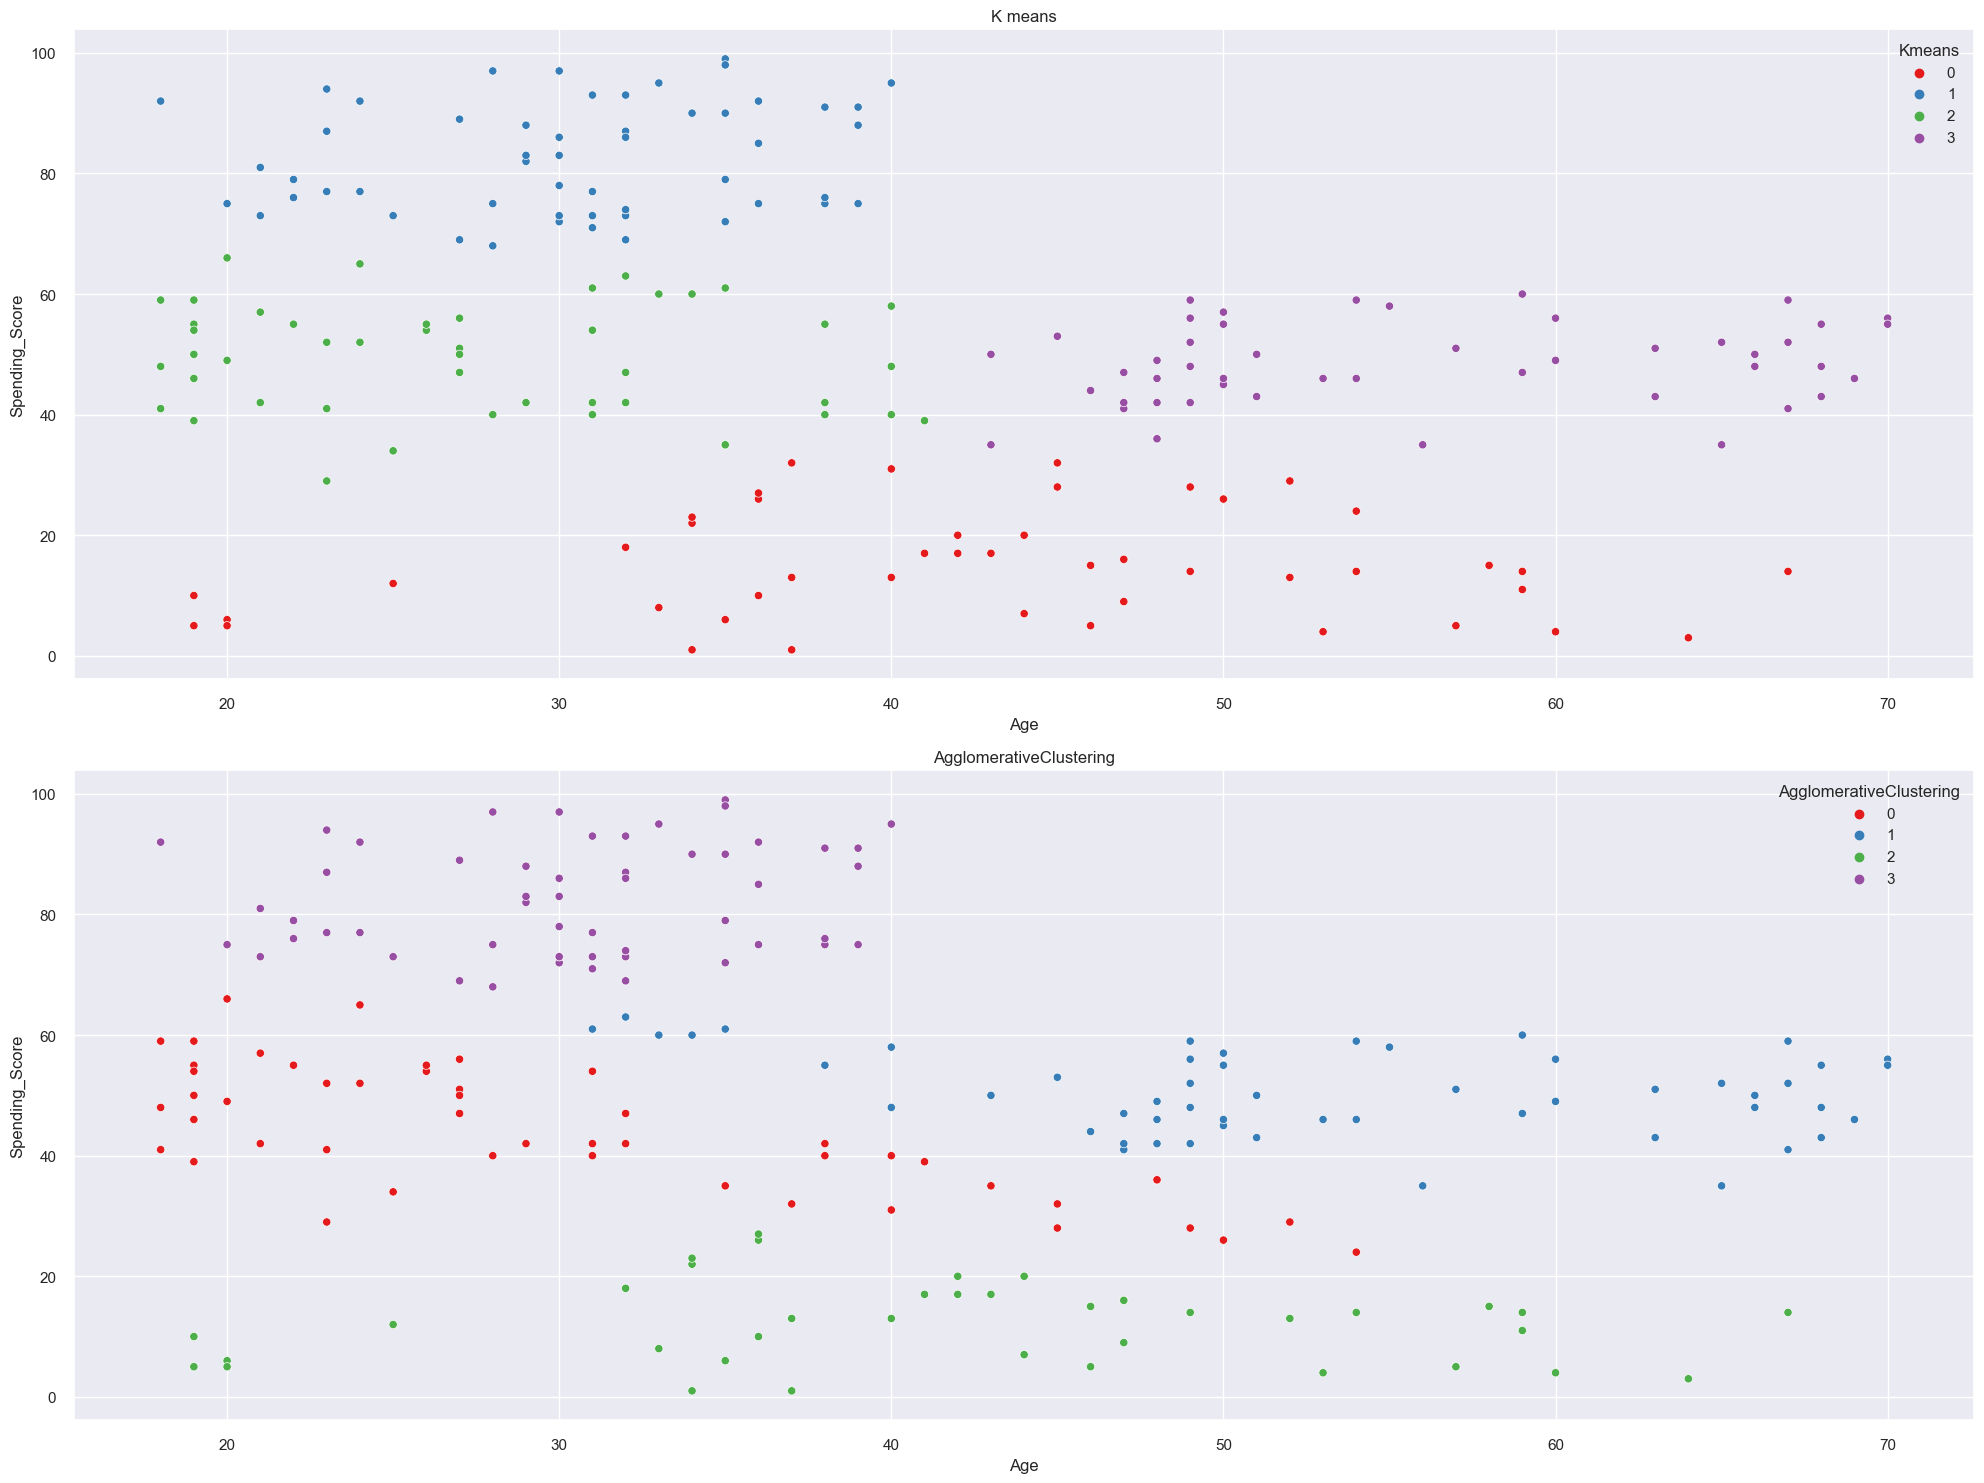

In [835]:
plt.figure(figsize=(20, 15))
ax1 = plt.subplot(211)
create_scatterplot(ax1, 'Age', 'Spending_Score', 'Kmeans', 'K means',X)

ax2 = plt.subplot(212)
create_scatterplot(ax2, 'Age', 'Spending_Score', 'AgglomerativeClustering', 'AgglomerativeClustering',X)

plt.tight_layout()
plt.show()


#### Annual Income and Spending Score- x2

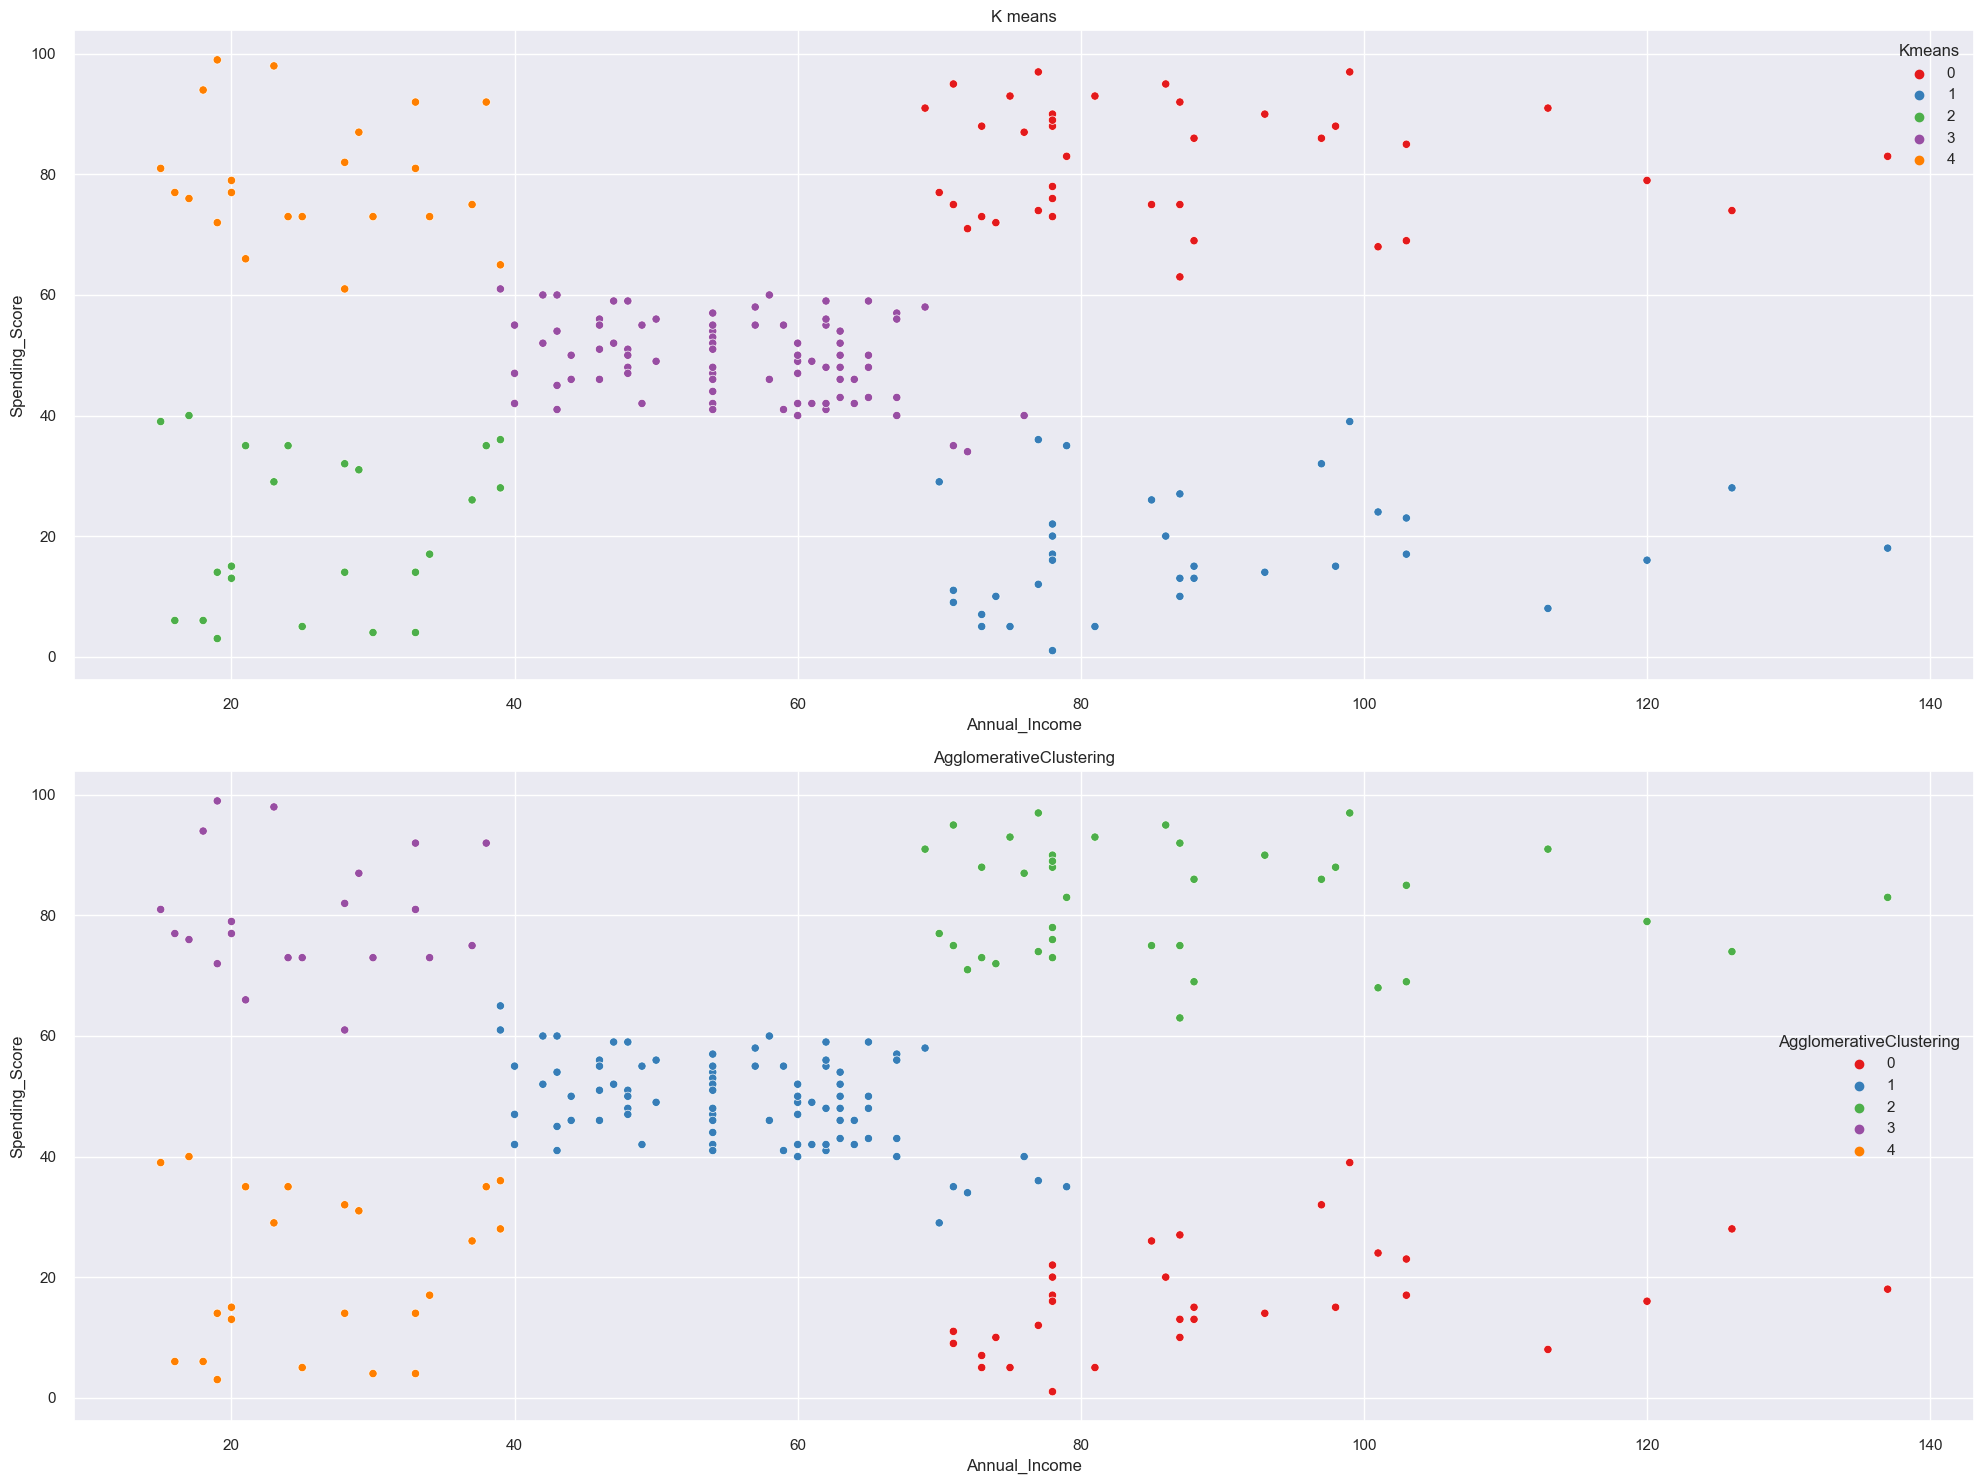

In [836]:
plt.figure(figsize=(20, 15))
ax1 = plt.subplot(211)
create_scatterplot(ax1, 'Annual_Income', 'Spending_Score', 'Kmeans', 'K means',X_AS)

ax2 = plt.subplot(212)
create_scatterplot(ax2, 'Annual_Income', 'Spending_Score', 'AgglomerativeClustering', 'AgglomerativeClustering',X_AS)

plt.tight_layout()
plt.show()


#### Interpretation based on Age and Spending Score- x1

In [837]:
import plotly.express as px

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
cluster_counts = X['Kmeans'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

fig = px.bar(cluster_counts, x='Cluster', y='Count', title="Number of Customers in Each Cluster (K-Means)")
fig.update_layout(xaxis_title="Clusters", yaxis_title="Count")

fig.update_traces(marker=dict(color=custom_colors))

fig.show()


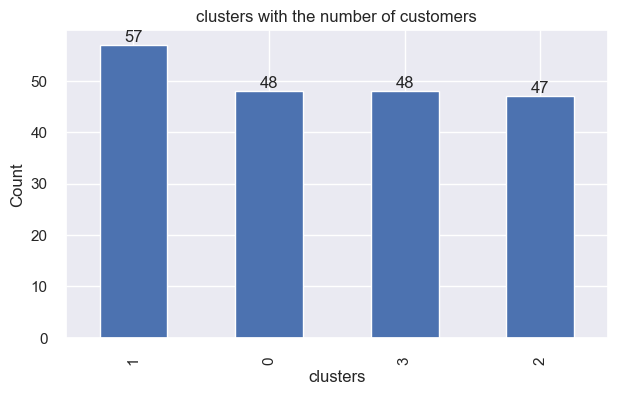

In [838]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X['Kmeans'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [839]:
df.head(1)

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39


In [840]:
df["Kmeans_Cluster_Age_Speanding"] = X['Kmeans']
df.head(1)

,Gender,Age,Annual_Income,Spending_Score,Kmeans_Cluster_Age_Speanding
0,Male,19,15,39,2


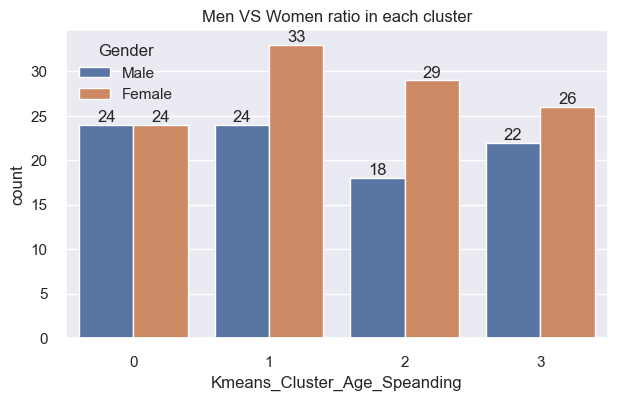

In [841]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df['Kmeans_Cluster_Age_Speanding'], hue=df['Gender'])
for p in ax.containers:
    ax.bar_label(p)

In [842]:
df.groupby('Kmeans_Cluster_Age_Speanding').mean()

,Age,Annual_Income,Spending_Score
Kmeans_Cluster_Age_Speanding,,,
0,43.291667,66.937500,15.020833
1,30.175439,66.070175,82.350877
2,27.617021,53.276596,49.148936
3,55.708333,54.770833,48.229167


In [843]:
def create_box_strip_plots(data, x, y, title, subplot_position):
    plt.subplot(subplot_position)
    sns.boxplot(y=y, x=x, data=data, palette="dark")
    sns.stripplot(y=y, x=x, data=data, palette="dark")
    plt.title(title)

def create_box_swarm_plots(data, x, y, hue, title, subplot_position): # Add hue 
    plt.subplot(subplot_position)
    sns.boxplot(y=y, x=x, hue=hue, data=data, palette="deep", saturation=0.5)
    sns.swarmplot(y=y, x=x, hue=hue, data=data, palette=sns.color_palette("Paired"))

    plt.title(title)

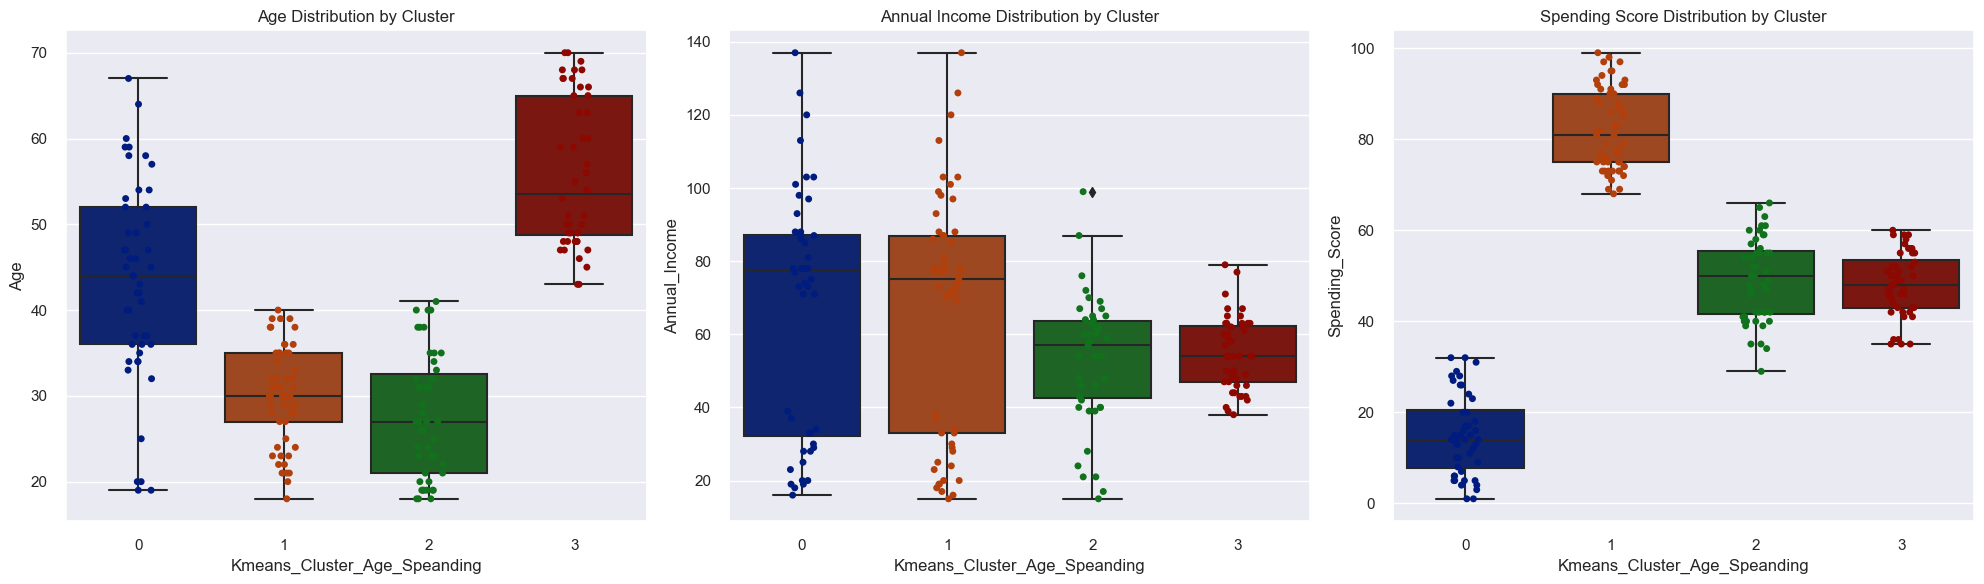

In [844]:

plt.figure(figsize=(20, 6))

create_box_strip_plots(df, "Kmeans_Cluster_Age_Speanding", "Age", "Age Distribution by Cluster", 131)
create_box_strip_plots(df, "Kmeans_Cluster_Age_Speanding", "Annual_Income", "Annual Income Distribution by Cluster", 132)
create_box_strip_plots(df, "Kmeans_Cluster_Age_Speanding", "Spending_Score", "Spending Score Distribution by Cluster", 133)

plt.tight_layout()
plt.show()

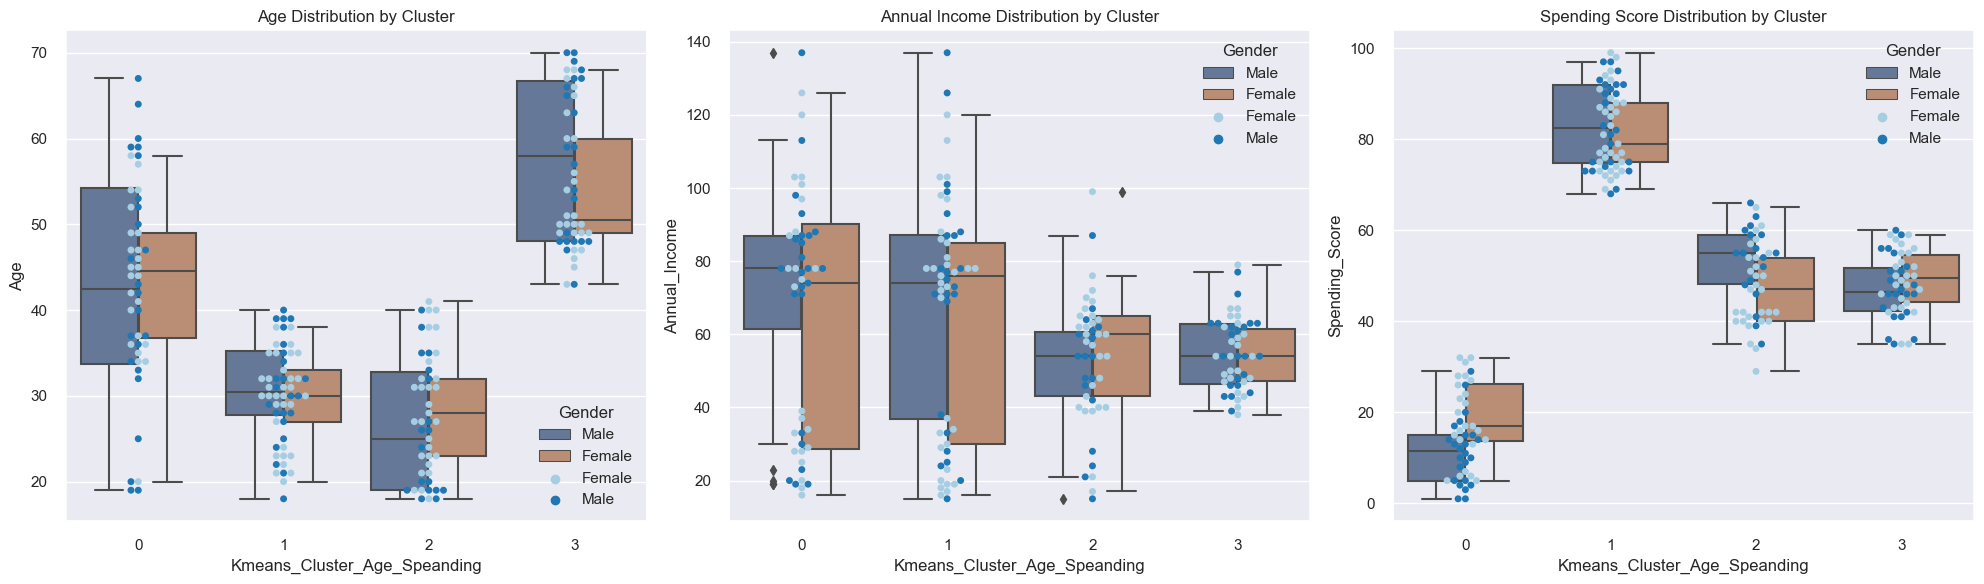

In [845]:
plt.figure(figsize=(20, 6))

create_box_swarm_plots(df, "Kmeans_Cluster_Age_Speanding", "Age", "Gender", "Age Distribution by Cluster", 131)
create_box_swarm_plots(df, "Kmeans_Cluster_Age_Speanding", "Annual_Income", "Gender", "Annual Income Distribution by Cluster", 132)
create_box_swarm_plots(df, "Kmeans_Cluster_Age_Speanding", "Spending_Score", "Gender", "Spending Score Distribution by Cluster", 133)

plt.tight_layout()
plt.show()



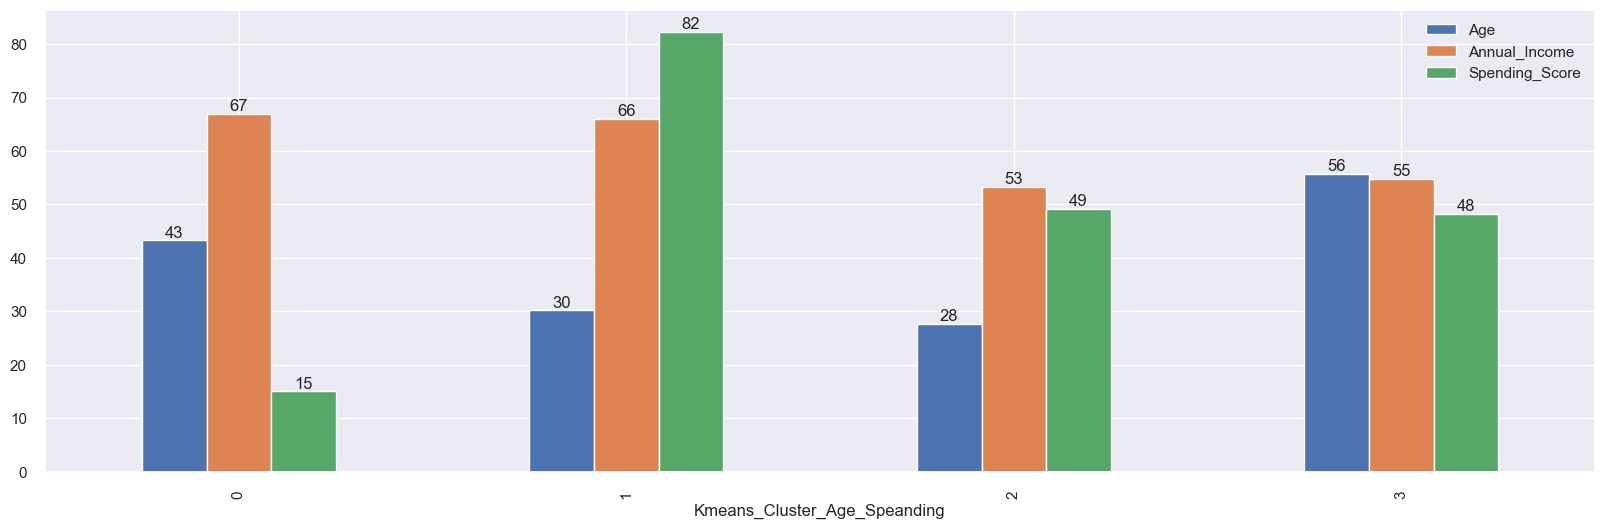

In [846]:
ax = df.groupby("Kmeans_Cluster_Age_Speanding").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

### Conclusion

**cluster 0**: The average age is around 43, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 1** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    

**cluster 2** : The average age is around 28, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.
    
**cluster 3**: The average age is around 56.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [847]:
X_AS.head(1)

,Annual_Income,Spending_Score,Kmeans,AgglomerativeClustering
0,15,39,2,4


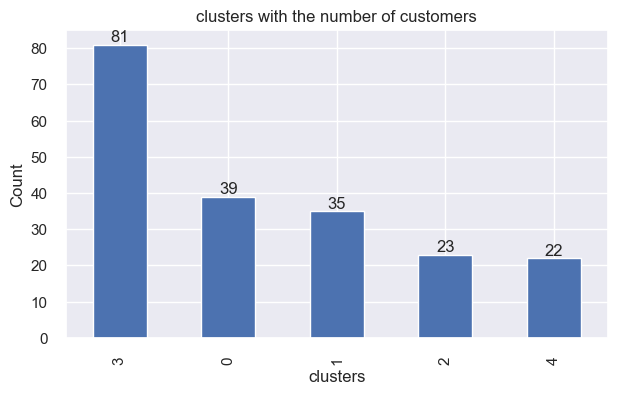

In [848]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X_AS['Kmeans'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [849]:
df_AS = df.drop(columns='Kmeans_Cluster_Age_Speanding').copy()
df_AS.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [850]:

df_AS["Kmeans_Cluster_Income_Speanding"] = X_AS['Kmeans']
df_AS


,Gender,Age,Annual_Income,Spending_Score,Kmeans_Cluster_Income_Speanding
0,Male,19,15,39,2
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,1
197,Male,32,126,74,0
198,Male,32,137,18,1


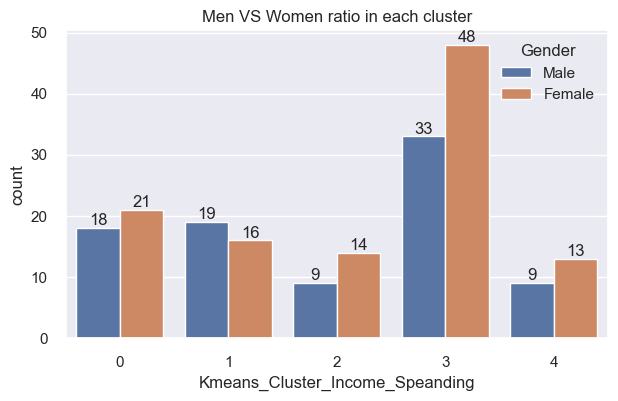

In [851]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df_AS["Kmeans_Cluster_Income_Speanding"], hue=df_AS['Gender'])
for p in ax.containers:
    ax.bar_label(p)

In [852]:
df_AS.groupby(["Gender", "Kmeans_Cluster_Income_Speanding"]).mean().reset_index()


,Gender,Kmeans_Cluster_Income_Speanding,Age,Annual_Income,Spending_Score
0,Female,0,32.190476,86.047619,81.666667
1,Female,1,43.250000,90.937500,22.062500
2,Female,2,43.214286,27.357143,21.714286
3,Female,3,40.895833,55.354167,49.000000
4,Female,4,25.461538,25.692308,80.538462
5,Male,0,33.277778,87.111111,82.666667
6,Male,1,39.315789,85.894737,12.947368
7,Male,2,48.333333,24.666667,19.666667
8,Male,3,45.363636,55.212121,50.272727
9,Male,4,25.000000,25.777778,77.666667


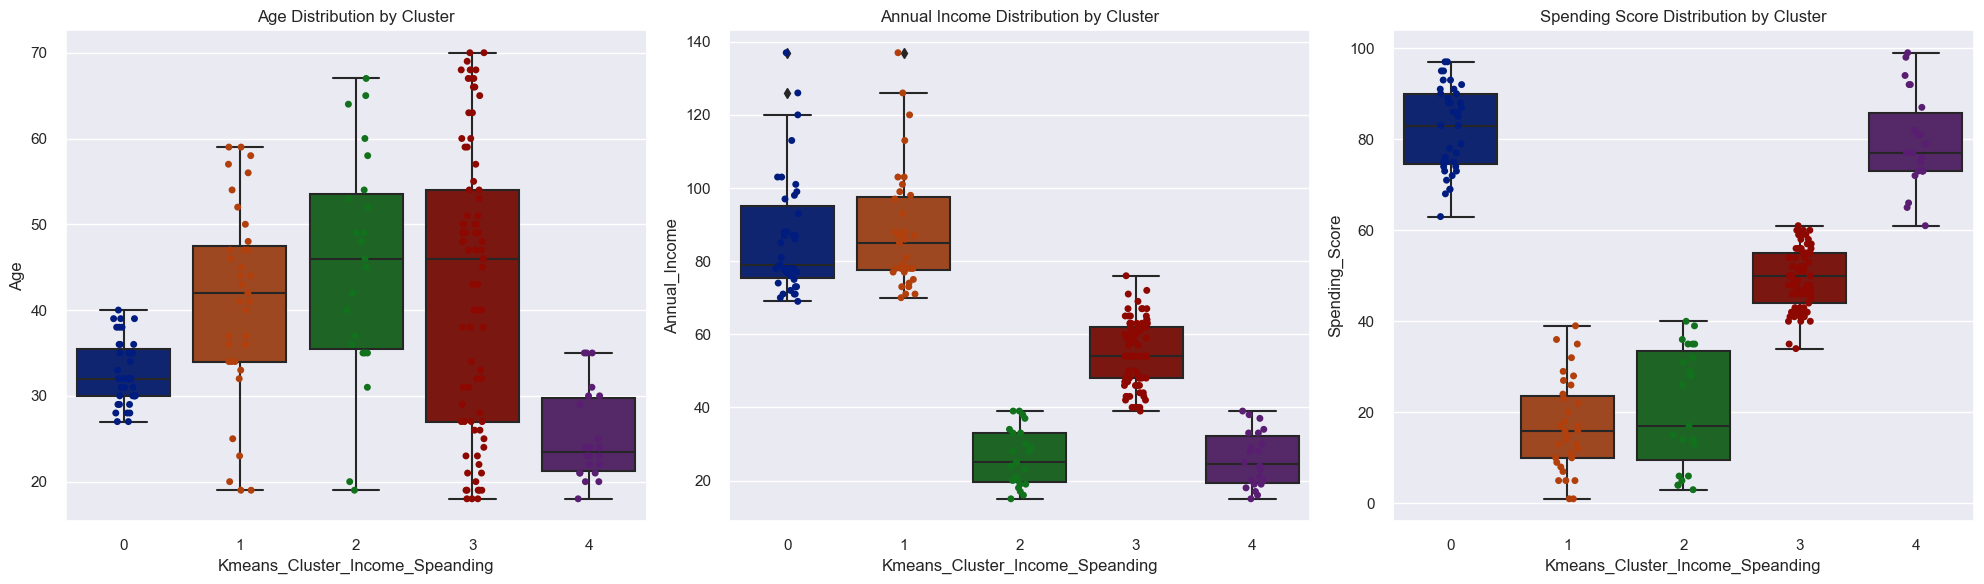

In [853]:

plt.figure(figsize=(20, 6))

create_box_strip_plots(df_AS, "Kmeans_Cluster_Income_Speanding", "Age", "Age Distribution by Cluster", 131)
create_box_strip_plots(df_AS, "Kmeans_Cluster_Income_Speanding", "Annual_Income", "Annual Income Distribution by Cluster", 132)
create_box_strip_plots(df_AS, "Kmeans_Cluster_Income_Speanding", "Spending_Score", "Spending Score Distribution by Cluster", 133)

plt.tight_layout()
plt.show()

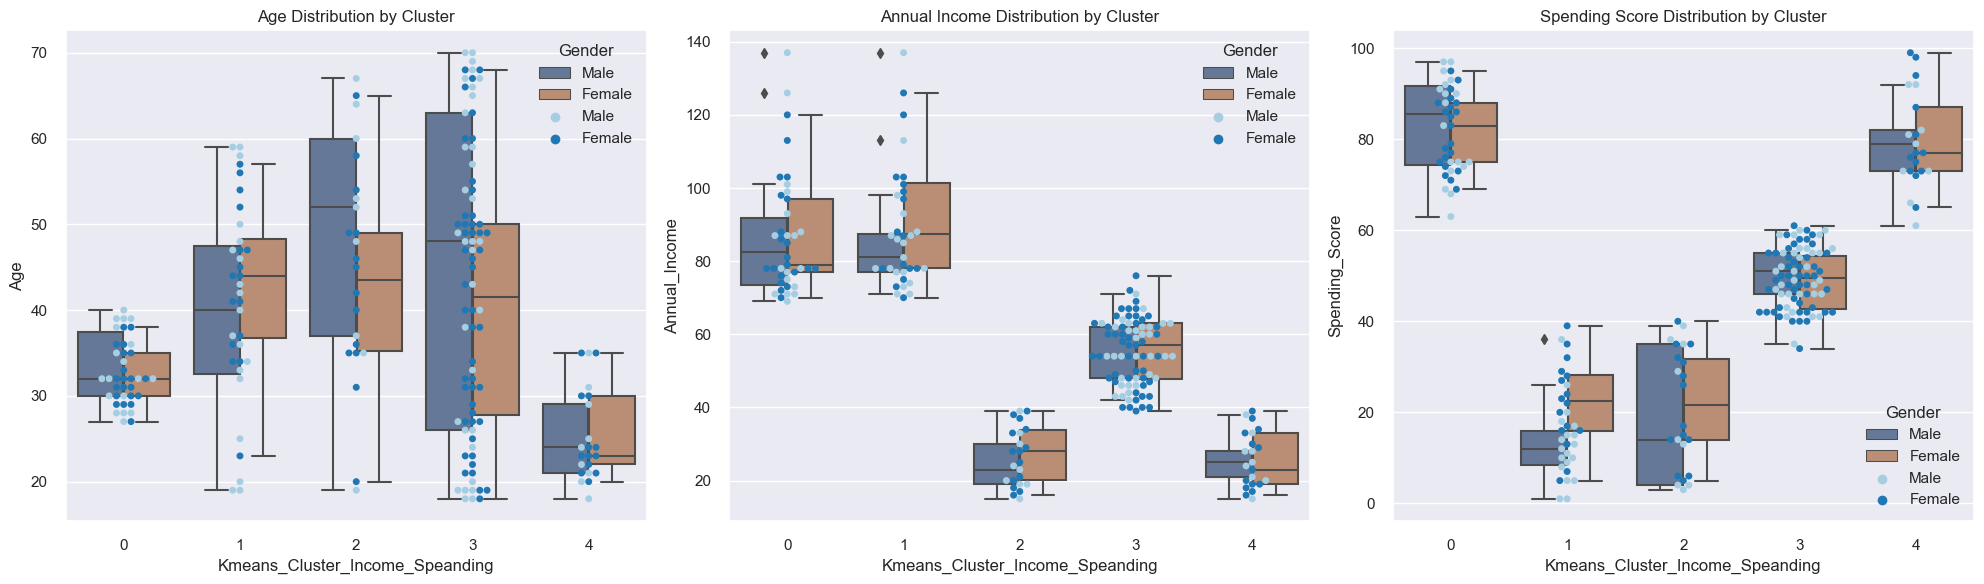

In [854]:
plt.figure(figsize=(20, 6))

create_box_swarm_plots(df_AS, "Kmeans_Cluster_Income_Speanding", "Age", "Gender", "Age Distribution by Cluster", 131)
create_box_swarm_plots(df_AS, "Kmeans_Cluster_Income_Speanding", "Annual_Income", "Gender", "Annual Income Distribution by Cluster", 132)
create_box_swarm_plots(df_AS, "Kmeans_Cluster_Income_Speanding", "Spending_Score", "Gender", "Spending Score Distribution by Cluster", 133)

plt.tight_layout()
plt.show()


In [855]:
Mean_Income_Speanding_Gender = df_AS.groupby(["Gender", "Kmeans_Cluster_Income_Speanding"]).mean()
Mean_Income_Speanding= df_AS.drop(columns = 'Gender').groupby("Kmeans_Cluster_Income_Speanding").mean()

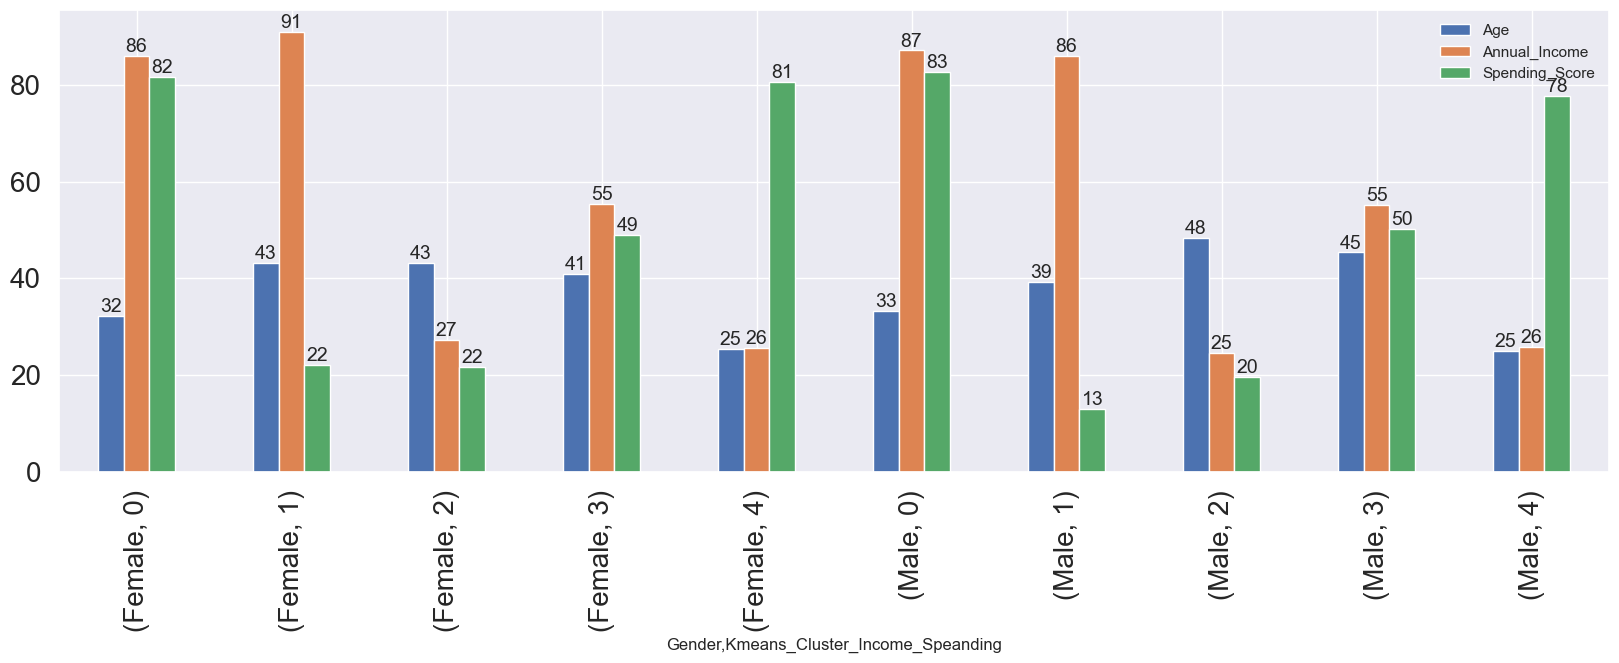

In [856]:
ax = Mean_Income_Speanding_Gender.plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion

### Female
**Cluster 0**: Customers in this cluster have an average age of around 32, with very high annual income and spending scores. They represent our loyal customers and are a significant source of company profit. Special promotions should be considered to retain their loyalty.

**Cluster 1**: In this cluster, the average age is approximately 43, with very high annual income but surprisingly low spending scores. These customers are a key target audience with untapped potential. Developing specialized marketing strategies to encourage higher spending among this group is crucial.

**Cluster 2**: For this cluster, the average age is around 43, and both annual income and spending scores are low. Encouraging shopping through gift certificates might be effective.

**Cluster 3**: Customers in this cluster have an average age of about 41, with both annual income and spending scores falling within the average range. Further research is needed to identify opportunities for increasing their spending behavior.

**Cluster 4**: This cluster consists of customers with an average age of around 25. While their annual incomes are low, they have very high spending scores. Although they engage in frequent shopping, their contribution to overall profit is limited. Strategies should be developed to maximize their profitability.

### Male
**Cluster 0**: The average age is around 45, and both annual income and spending scores fall within the average range. Further research is needed to identify opportunities to increase their spending behavior.

**Cluster 1**: In this cluster, the average age is approximately 40, with very high annual income but surprisingly low spending scores. These customers are a key target audience with untapped potential. Developing specialized marketing strategies to encourage higher spending among this group is crucial.

**Cluster 2**: For this cluster, the average age is around 50, and both annual income and spending scores are low. Encouraging shopping through gift certificates might be effective.

**Cluster 3**: This cluster consists of customers with an average age of around 25. While their annual incomes are low, they have very high spending scores. Although they engage in frequent shopping, their contribution to overall profit is limited. Strategies should be developed to maximize their profitability.

**Cluster 4**: Customers in this cluster have an average age of around 30, with very high annual income and spending scores. They represent our loyal customers and are a significant source of company profit. Special promotions should be considered to retain their loyalty.

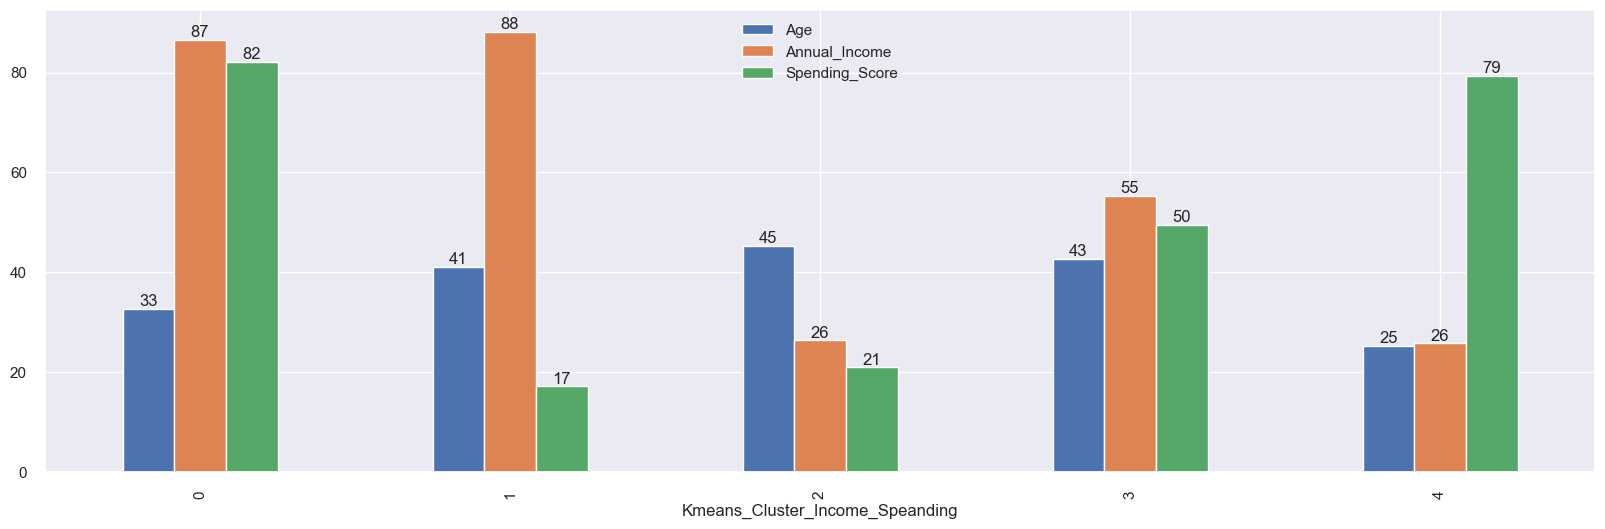

In [857]:
ax = Mean_Income_Speanding.plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")


**Cluster 0**: Customers in this group have an average age of around 33, along with very high annual income and spending scores. They are our loyal customers and a primary source of company profit. Special promotions are recommended to retain their loyalty.

**Cluster 1**: In this cluster, the average age is approximately 41, with very high annual income but very low spending scores. These customers are a key target audience. Tailored marketing strategies are essential to encourage higher spending.

**Cluster 2**: The average age for this cluster is around 45, and both annual income and spending scores are low. Encouraging shopping with gift certificates may be effective.

**Cluster 3**: Customers in this cluster have an average age of about 43, with both annual income and spending scores falling within the average range. Exploring opportunities to boost their spending is advisable.

**Cluster 4**: This cluster is characterized by an average age of around 25, low annual incomes, and very high spending scores. While they shop frequently, they contribute less to overall profit. Strategies to maximize their profitability should be considered.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [1]:
import pytorch_lightning

In [1]:
import sklearn

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import tensorflow as tf


: 

: 